In [69]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#matplotlib.rcParams['font.family'] = 'serif'
#rc('font',**{'family':'serif','serif':['Helvetica']})
#matplotlib.rcParams['font.family'] = 'serif'
rc('font',**{'family':'serif','serif':['Times']})
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times']

rc('text', usetex=True)
#rc('text.latex', preamble=r'\usepackage{cmbright}')
#fontProperties = {'family':'serif','serif':['Times'],
#    'weight' : 'normal', 'size' : 14}
warnings.filterwarnings('ignore')
figPath = "/Users/Ali/repos/beams_and_flow_FSI/figures"
tick_font_size = 22

In [28]:
def get_cmap(n, name='jet'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def calcVortexSheddingFreq(Cl_data,time,h_beam,u_mid_beam):
    
    import numpy as np
    import scipy.signal as signal
    import matplotlib.pyplot as plt
    
    N = len(time)
    dt = time[2] - time[1]
    
    nmax=512 # no. of points in the fft
    freq, Cl_amp = signal.welch(Cl_data, 1./dt, nperseg=nmax)
    Cl_max_fft_idx = np.argmax(abs(Cl_amp))  
    freq_shed      = freq[Cl_max_fft_idx ] # Vortex shedding freq [Hz]
    St             = freq_shed * h_beam / u_mid_beam
    
    
    return freq, Cl_amp, St

In [246]:
dataPath = "/Users/Ali/Dropbox/paper/2D_multi_beams/paper_states/paper_data"
problems = ['U02E6H4', 'U02E6H6', 'U02E7H4', 'U02E7H6',\
            'U02E9H4', 'U02E9H6', 'U02E12H4','U02E12H6',\
            'U02E9H8', 'U02E12H8',\
            'U05E6H4', 'U05E6H6', 'U05E7H4', 'U05E7H6',\
            'U05E9H4', 'U05E9H6', 'U05E12H4','U05E12H6',\
            'U05E9H8', 'U05E12H8',\
            'U20E6H4', 'U20E6H6', 'U20E7H4', 'U20E7H6',\
            'U20E9H4', 'U20E9H6', 'U20E12H4','U20E12H6',\
            'U20E9H8', 'U20E12H8']
tstep_start = 5
tstep_end=100
U_inf= 0.2
h_channel = 1.2
w_plate = 0.05
rho_f = 1000
depth_plate = 0.5
area_plate = depth_plate*w_plate

### U02E6H4

In [438]:
print(problems[0])

U02E6H4


In [603]:
problemPath = "{0}/{1}".format(dataPath,problems[0])
figPrefix = "{0}".format(problems[0])
tstep_start =5
U_inf = 0.2
h_beam = 0.4

In [604]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_8_1_d  = pd.read_csv('%s/disp-1-8.csv'%problemPath)
p_8_1_fd = pd.read_csv('%s/force-1-8.csv'%problemPath)
p_8_1_fl = pd.read_csv('%s/force-1-8.csv'%problemPath)
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_2s = pd.read_csv('%s/2delta-1-2s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)
p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)
p_2_2s = pd.read_csv('%s/2delta-2-2s.csv'%problemPath)
p_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)
p_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)
p_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)
p_4_1s = pd.read_csv('%s/2delta-4-1s.csv'%problemPath)
p_4_2s = pd.read_csv('%s/2delta-4-2s.csv'%problemPath)
p_4_10s = pd.read_csv('%s/2delta-4-10s.csv'%problemPath)
p_4_40s = pd.read_csv('%s/2delta-4-40s.csv'%problemPath)
p_4_80s = pd.read_csv('%s/2delta-4-80s.csv'%problemPath)

In [605]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]
ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)
p_8_1_d = p_8_1_d[['Time','D:0','D:1']]
p_8_1_fd = p_8_1_fd[['p','force:0']]
p_8_1_fl = p_8_1_fl[['p','force:1']]
ddf_8_1 = pd.concat([p_8_1_d, p_8_1_fd], axis=1)
df_8_1 = pd.concat([ddf_8_1, p_8_1_fl], axis=1)
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_2s = p_1_2s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]
df_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]
df_2_2s = p_2_2s[['arc_length','U:0','U:1','U:2']]
df_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]
df_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]
df_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]
df_4_1s = p_4_1s[['arc_length','U:0','U:1','U:2']]
df_4_2s = p_4_2s[['arc_length','U:0','U:1','U:2']]
df_4_10s = p_4_10s[['arc_length','U:0','U:1','U:2']]
df_4_40s = p_4_40s[['arc_length','U:0','U:1','U:2']]
df_4_80s = p_4_80s[['arc_length','U:0','U:1','U:2']]

## Drag Coefficient

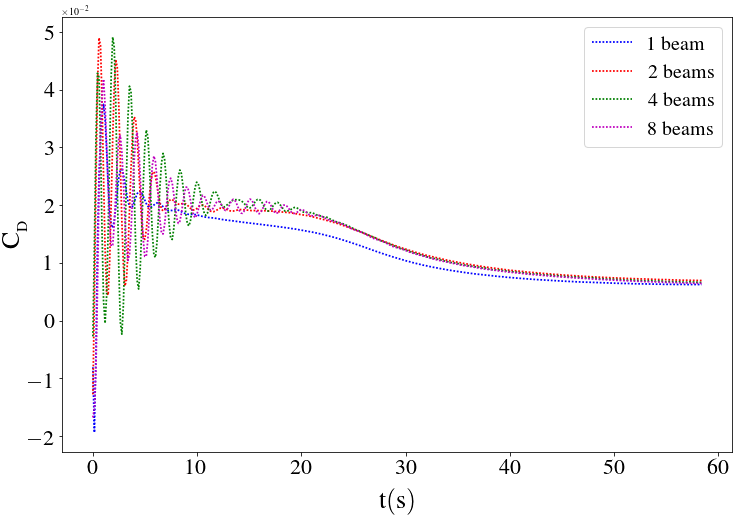

In [606]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1
numer_drag_4_1 = 2*h_beam*df_4_1['force:0']
denom_4_1 = rho_f*(U_inf*((h_beam-p_4_1_d['D:1'])**2)/2/h_channel)**2
CD_4_1 = numer_drag_4_1/denom_4_1
numer_drag_8_1 = 2*h_beam*df_8_1['force:0']
denom_8_1 = rho_f*(U_inf*((h_beam-p_8_1_d['D:1'])**2)/2/h_channel)**2
CD_8_1 = numer_drag_8_1/denom_8_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")
f4 = interpolate.interp1d(time, CD_4_1[tstep_start:tstep_end],kind= "cubic")
f8 = interpolate.interp1d(time, CD_8_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)
y2_cd = f2(time_smooth)
y4_cd = f4(time_smooth)
y8_cd = f8(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.plot(time_smooth,y4_cd-0.001, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")
ax.plot(time_smooth,y8_cd, linestyle=linestyle, linewidth =1.75, color=cols[3],label="$\\mathrm{8 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ drag \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Lift Coefficient

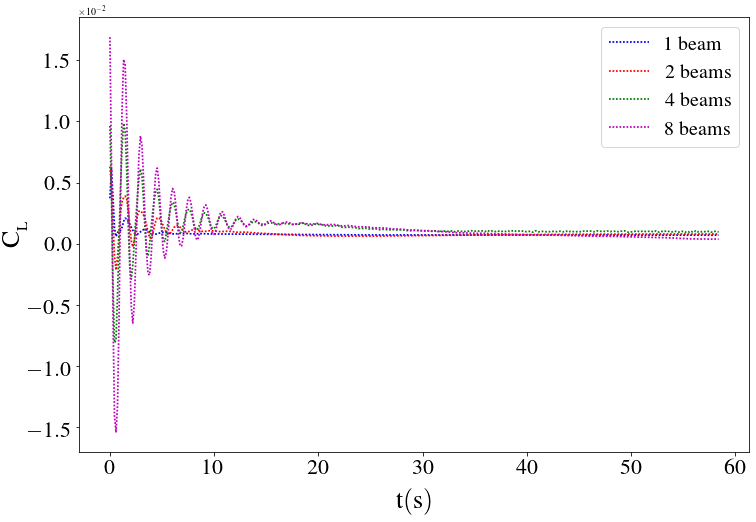

In [607]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1
numer_drag_4_1 = 2*h_beam*df_4_1['force:1']
denom_4_1 = rho_f*(U_inf*((h_beam-p_4_1_d['D:1'])**2)/2/h_channel)**2
CL_4_1 = numer_drag_4_1/denom_4_1
numer_drag_8_1 = 2*h_beam*df_8_1['force:1']
denom_8_1 = rho_f*(U_inf*((h_beam-p_8_1_d['D:1'])**2)/2/h_channel)**2
CL_8_1 = numer_drag_8_1/denom_8_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")
f4 = interpolate.interp1d(time, CL_4_1[tstep_start:tstep_end],kind= "cubic")
f8 = interpolate.interp1d(time, CL_8_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)
y4_cl = f4(time_smooth)
y8_cl = f8(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.plot(time_smooth,y4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")
ax.plot(time_smooth,y8_cl-0.001, linestyle=linestyle, linewidth=1.75, color=cols[3],label="$\\mathrm{8 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

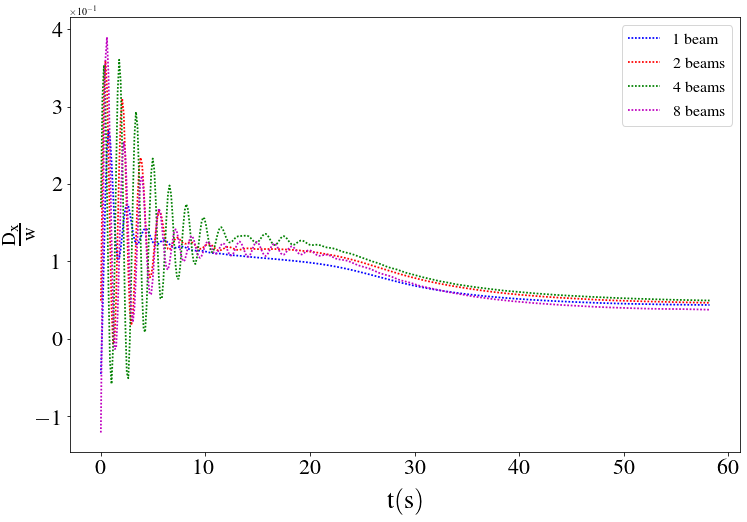

In [608]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate
d_4_1 = df_4_1['D:0']/w_plate
d_8_1 = df_8_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")
f4 = interpolate.interp1d(time, d_4_1[tstep_start:tstep_end],kind= "cubic")
f8 = interpolate.interp1d(time, d_8_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)
y4 = f4(time_smooth)
y8 = f8(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.plot(time_smooth,y4, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")
ax.plot(time_smooth,y8, linestyle=linestyle, linewidth=1.75, color=cols[3],label="$\\mathrm{8 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

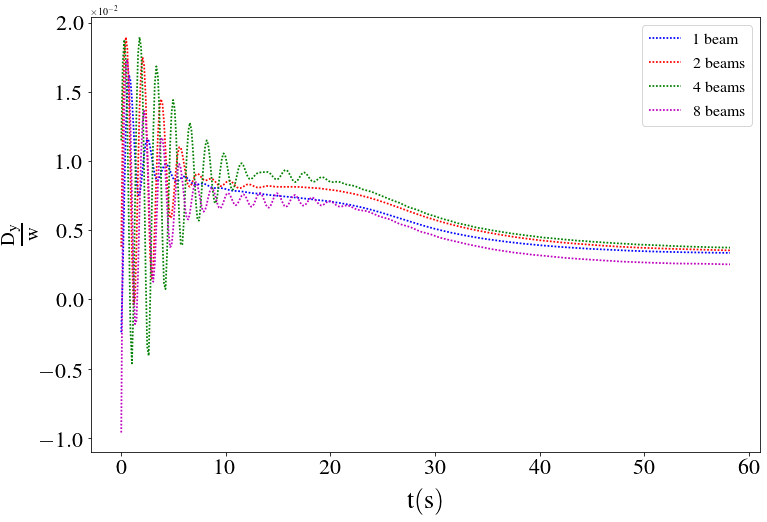

In [609]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate
d_4_1 = df_4_1['D:1']/w_plate
d_8_1 = df_8_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")
f4 = interpolate.interp1d(time, d_4_1[tstep_start:tstep_end],kind= "cubic")
f8 = interpolate.interp1d(time, d_8_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)
y4 = f4(time_smooth)
y8 = f8(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.plot(time_smooth,y4, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")
ax.plot(time_smooth,y8, linestyle=linestyle, linewidth=1.75, color=cols[3],label="$\\mathrm{8 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Vortex Shedding

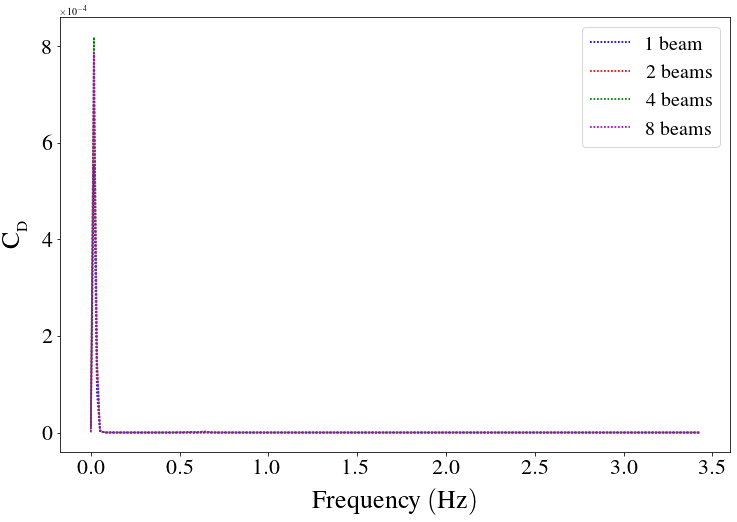

In [610]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
u_mid_4 = U_inf*(h_beam-p_4_1_d['D:1'][tstep_end])/h_channel/2
u_mid_8 = U_inf*(h_beam-p_8_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
f_4, Cd_amp_4, St4 = calcVortexSheddingFreq(y4_cd,time_smooth,h_beam,u_mid_4)
f_8, Cd_amp_8, St8 = calcVortexSheddingFreq(y8_cd,time_smooth,h_beam,u_mid_8)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.plot(f_4, Cd_amp_4,linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")   
ax.plot(f_8, Cd_amp_8,linestyle=linestyle, linewidth=1.75, color=cols[3],label="$\\mathrm{8 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

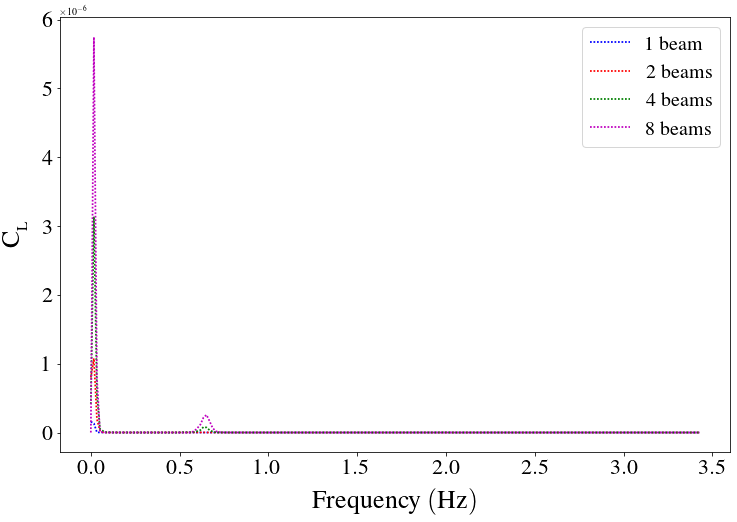

In [611]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
u_mid_4 = U_inf*(h_beam-p_4_1_d['D:1'][tstep_end])/h_channel/2
u_mid_8 = U_inf*(h_beam-p_8_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
f_4, Cl_amp_4, St4 = calcVortexSheddingFreq(y4_cl,time_smooth,h_beam,u_mid_4)
f_8, Cl_amp_8, St8 = calcVortexSheddingFreq(y8_cl,time_smooth,h_beam,u_mid_8)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.plot(f_4, Cl_amp_4,linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")   
ax.plot(f_8, Cl_amp_8,linestyle=linestyle, linewidth=1.75, color=cols[3],label="$\\mathrm{8 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [612]:
y1_02_e6_h4_cd =y1_cd 
y1_02_e6_h4_cl =y1_cl 
y2_02_e6_h4_cd =y2_cd 
y2_02_e6_h4_cl =y2_cl 
y4_02_e6_h4_cd =y4_cd 
y4_02_e6_h4_cl =y4_cl 
y8_02_e6_h4_cd =y8_cd 
y8_02_e6_h4_cl =y8_cl 

### U02E7H4

In [613]:
print(problems[2])

U02E7H4


In [614]:
problemPath = "{0}/{1}".format(dataPath,problems[2])
figPrefix = "{0}".format(problems[2])
U_inf = 0.2

In [615]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_2s = pd.read_csv('%s/2delta-1-2s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)

In [616]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]
ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_2s = p_1_2s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]

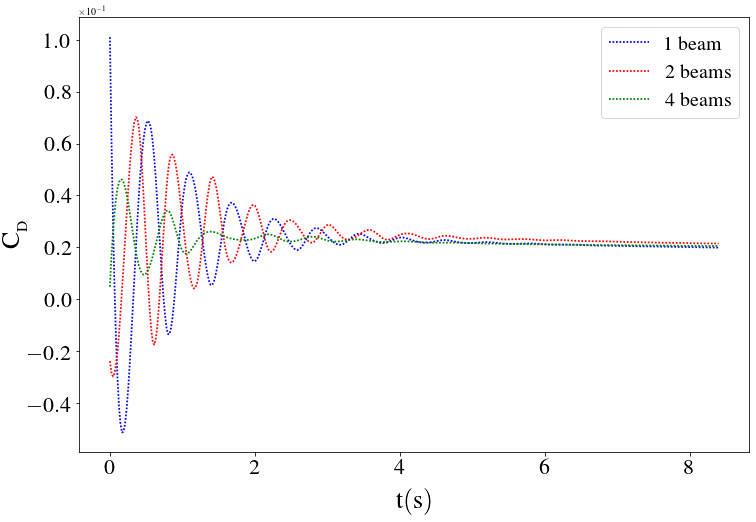

In [617]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=50
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1
numer_drag_4_1 = 2*h_beam*df_4_1['force:0']
denom_4_1 = rho_f*(U_inf*((h_beam-p_4_1_d['D:1'])**2)/2/h_channel)**2
CD_4_1 = numer_drag_4_1/denom_4_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")
f4 = interpolate.interp1d(time, CD_4_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)
y2_cd = f2(time_smooth)
y4_cd = f4(time_smooth)

ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.plot(time_smooth,y4_cd-0.001, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ drag \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

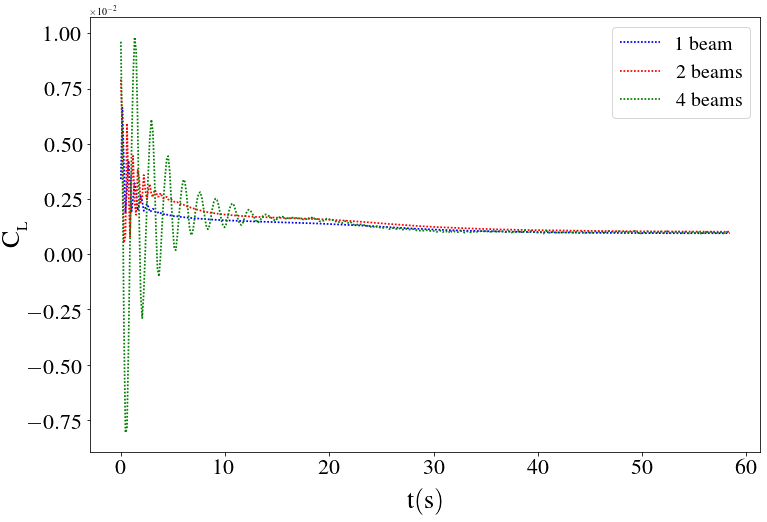

In [618]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1
numer_drag_4_1 = 2*h_beam*df_4_1['force:1']
denom_4_1 = rho_f*(U_inf*((h_beam-p_4_1_d['D:1'])**2)/2/h_channel)**2

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")
f4 = interpolate.interp1d(time, CL_4_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)
y4_cl = f4(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.plot(time_smooth,y4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

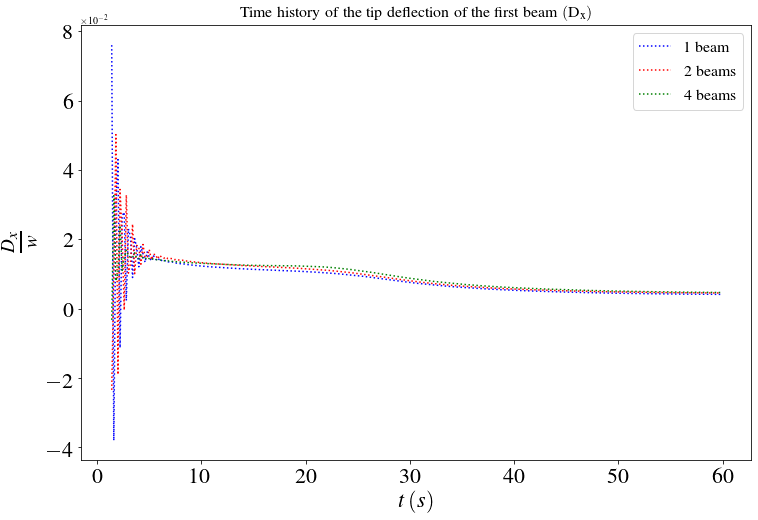

In [619]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(df_1_1['Time'][tstep_start:tstep_end], df_1_1['D:0'][tstep_start:tstep_end]/w_plate,'b:',label="$\\mathrm{1 \ beam}$")
ax.plot(df_2_1['Time'][tstep_start:tstep_end], df_2_1['D:0'][tstep_start:tstep_end]/w_plate,'r:',label="$\\mathrm{2 \ beams}$")
ax.plot(df_4_1['Time'][tstep_start:tstep_end], df_4_1['D:0'][tstep_start:tstep_end]/w_plate,'g:',label="$\\mathrm{4 \ beams}$")
ax.set_xlabel('$t\\, (s)$',fontsize=22)
ax.set_ylabel('$ \\frac{D_{x_{}}}{w}$',fontsize=26)
ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

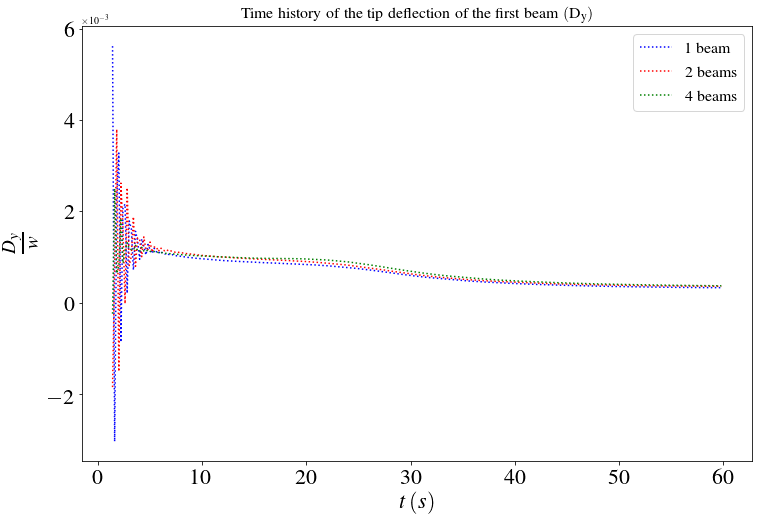

In [620]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(df_1_1['Time'][tstep_start:tstep_end], df_1_1['D:1'][tstep_start:tstep_end]/w_plate,'b:',label="$\\mathrm{1 \ beam}$")
ax.plot(df_2_1['Time'][tstep_start:tstep_end], df_2_1['D:1'][tstep_start:tstep_end]/w_plate,'r:',label="$\\mathrm{2 \ beams}$")
ax.plot(df_4_1['Time'][tstep_start:tstep_end], df_4_1['D:1'][tstep_start:tstep_end]/w_plate,'g:',label="$\\mathrm{4 \ beams}$")
ax.set_xlabel('$t\\, (s)$',fontsize=22)
ax.set_ylabel('$ \\frac{D_{y_{}}}{w}$',fontsize=26)
ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)

ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

### Number of beams effect on velocity evlution

In [621]:
E7U02df_1_1 = df_1_1.copy()
E7U02df_2_1 = df_2_1.copy()
E7U02df_4_1 = df_4_1.copy()
E7U02df_8_1 = df_8_1.copy()
E7U02df_1_1s = df_1_1s.copy()
E7U02df_1_10s = df_1_10s.copy()
E7U02df_1_40s = df_1_40s.copy()
E7U02df_2_1s = df_2_1s.copy()
E7U02df_2_10s = df_2_10s.copy()
E7U02df_2_40s = df_2_40s.copy()
E7U02df_4_1s = df_4_1s.copy()
E7U02df_4_10s = df_4_10s.copy()
E7U02df_4_40s = df_4_40s.copy()

### Stiffness effect

### Stiffness effect on drag coefficients:

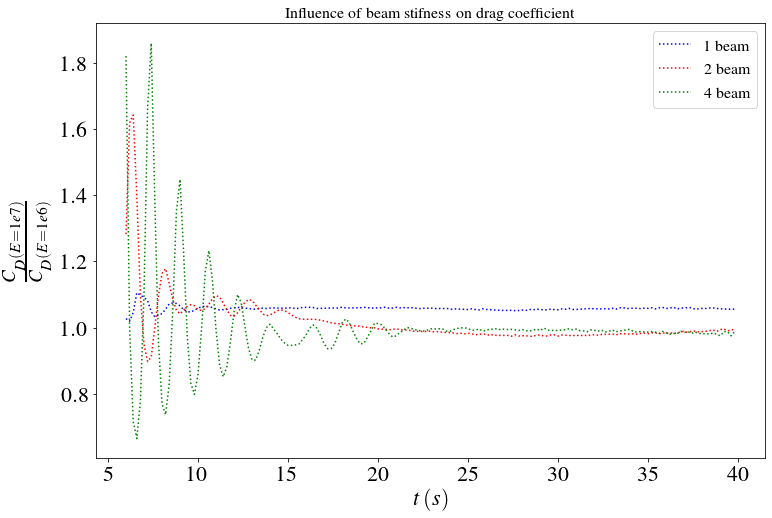

In [458]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
tstep_start=30
tstep_end = 200
ax.plot(E7U02df_1_1['Time'][tstep_start:tstep_end], E7U02df_1_1['force:0'][tstep_start:tstep_end]/E6U02df_1_1['force:0'][tstep_start:tstep_end],'b:',label="$\\mathrm{1 \ beam}$")
ax.plot(E7U02df_1_1['Time'][tstep_start:tstep_end], E7U02df_2_1['force:0'][tstep_start:tstep_end]/E6U02df_2_1['force:0'][tstep_start:tstep_end],'r:',label="$\\mathrm{2 \ beam}$")
ax.plot(E7U02df_1_1['Time'][tstep_start:tstep_end], E7U02df_4_1['force:0'][tstep_start:tstep_end]/E6U02df_4_1['force:0'][tstep_start:tstep_end],'g:',label="$\\mathrm{4 \ beam}$")
ax.set_xlabel('$t\\, (s)$',fontsize=22)
ax.set_ylabel('$ \\frac{C_{_D(E=1e7)}}{C_{_D(E=1e6)}}$',fontsize=26)
ax.set_title('$ \\mathrm{Influence \ of \ beam \ stifness \ on \ drag \ coefficient}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
#ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show()
fig.savefig('%s/CD_rel_E_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [459]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
tstep_start=40
tstep_end = 200
ax.plot(E7df_1_1['Time'][tstep_start:tstep_end], E7df_1_1['force:1'][tstep_start:tstep_end]/E6df_1_1['force:1'][tstep_start:tstep_end],'b:',label="$\\mathrm{1 \ beam}$")
ax.plot(E7df_1_1['Time'][tstep_start:tstep_end], E7df_2_1['force:1'][tstep_start:tstep_end]/E6df_2_1['force:1'][tstep_start:tstep_end],'r:',label="$\\mathrm{2 \ beam}$")
ax.plot(E7df_1_1['Time'][tstep_start:tstep_end], E7df_4_1['force:1'][tstep_start:tstep_end]/E6df_4_1['force:1'][tstep_start:tstep_end],'g:',label="$\\mathrm{4 \ beam}$")
ax.set_xlabel('$t\\, (s)$',fontsize=22)
ax.set_ylabel('$ \\frac{C_{_L(E=1e7)}}{C_{_L(E=1e6)}}$',fontsize=26)
ax.set_title('$ \\mathrm{Relative \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
#ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show()
fig.savefig('%s/CL_rel_E_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

NameError: name 'E7df_1_1' is not defined

In [622]:
y2_02_e7_h4_cd = y2_cd
y2_02_e7_h4_cl = y2_cl
y4_02_e7_h4_cd = y4_cd
y4_02_e7_h4_cl = y4_cl

### U02E7H6

In [623]:
print(problems[3])

U02E7H6


In [624]:
problemPath = "{0}/{1}".format(dataPath,problems[3])
figPrefix = "{0}".format(problems[3])
tstep_start =5
U_inf = 0.2
h_beam = 0.4
drag_force_to_coef = rho_f*U_inf**2*area_plate/2

In [625]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_2s = pd.read_csv('%s/2delta-1-2s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)
p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)
p_2_2s = pd.read_csv('%s/2delta-2-2s.csv'%problemPath)
p_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)
p_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)
p_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)

In [626]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_2s = p_1_2s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]
df_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]
df_2_2s = p_2_2s[['arc_length','U:0','U:1','U:2']]
df_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]
df_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]
df_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]

## Drag Coefficient

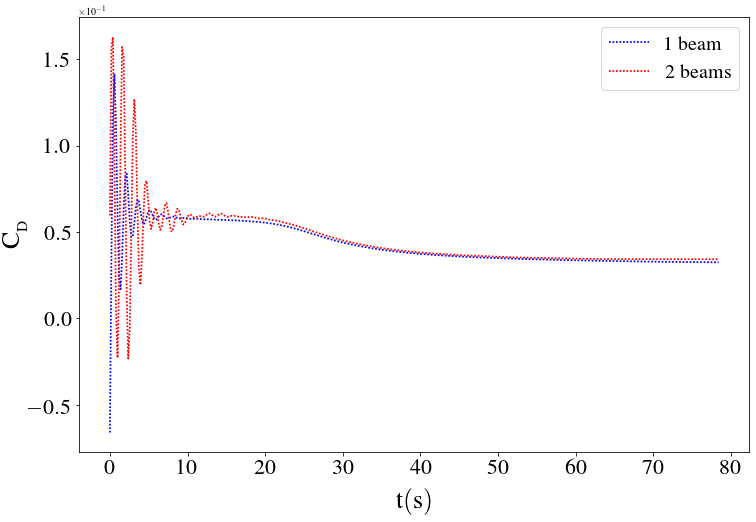

In [627]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)
y2_cd = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ drag \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Lift Coefficient

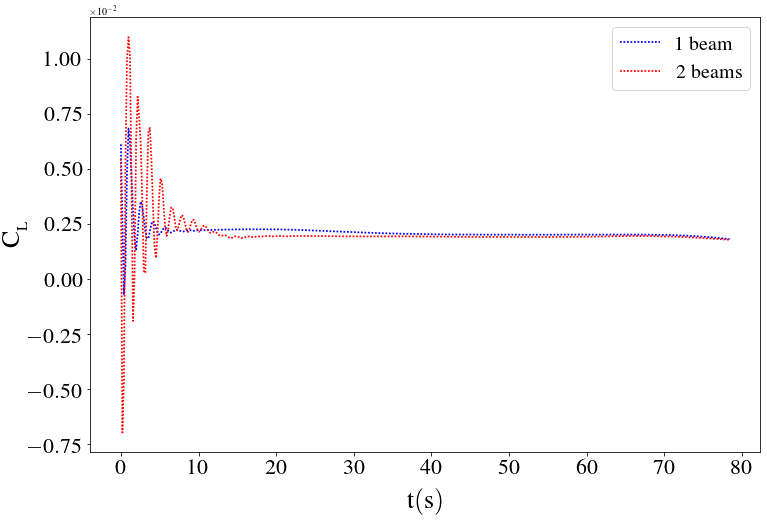

In [628]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

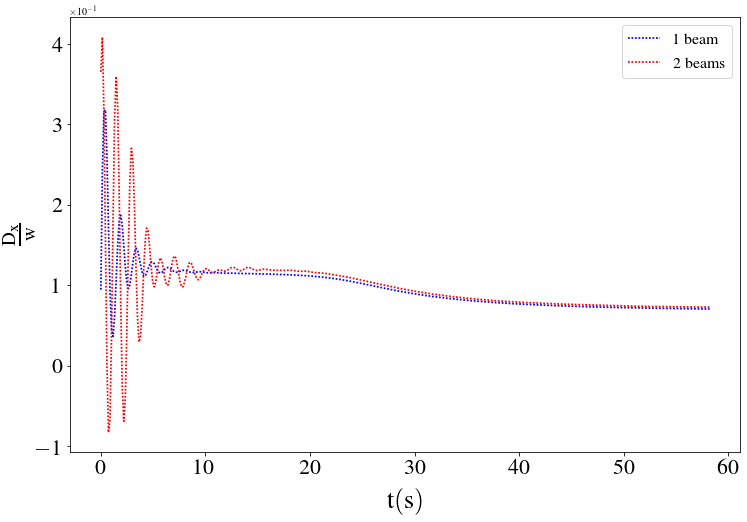

In [629]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate
d_4_1 = df_4_1['D:0']/w_plate
d_8_1 = df_8_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

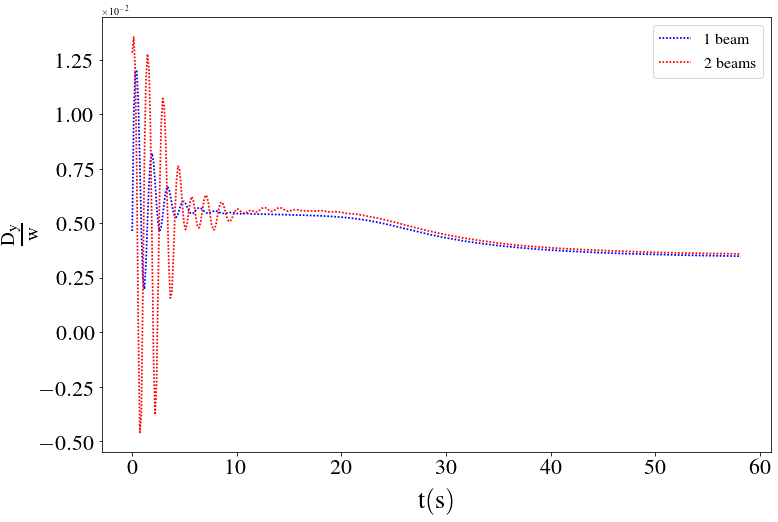

In [630]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Vortex Shedding

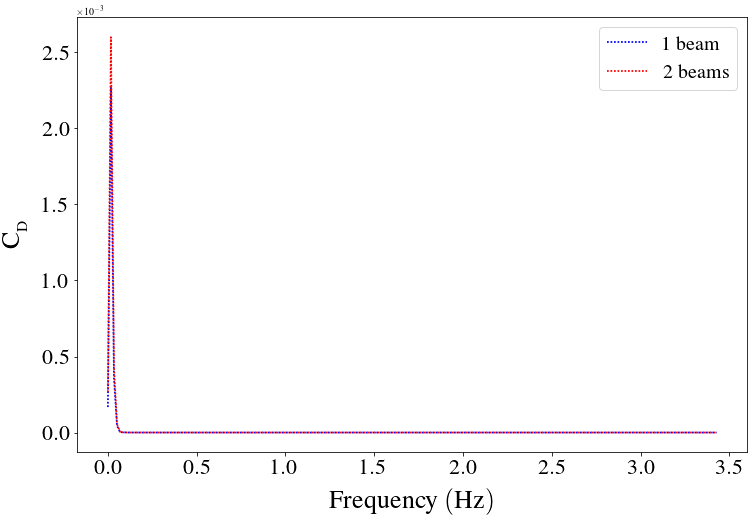

In [631]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [632]:
y1_02_e7_h6_cd = y1_cd
y1_02_e7_h6_cl = y1_cl
y2_02_e7_h6_cd = y2_cd
y2_02_e7_h6_cl = y2_cl

### U05E6H4

In [633]:
print(problems[10])

U05E6H4


In [634]:
problemPath = "{0}/{1}".format(dataPath,problems[10])
figPrefix = "{0}".format(problems[10])
tstep_start = 7
U_inf = 0.5

In [635]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-11.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-11.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)
p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)
p_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)
p_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)
p_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)
p_4_1s = pd.read_csv('%s/2delta-4-1s.csv'%problemPath)
p_4_10s = pd.read_csv('%s/2delta-4-10s.csv'%problemPath)
p_4_40s = pd.read_csv('%s/2delta-4-40s.csv'%problemPath)
p_4_80s = pd.read_csv('%s/2delta-4-80s.csv'%problemPath)

In [636]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]
ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]
df_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]
df_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]
df_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]
df_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]
df_4_1s = p_4_1s[['arc_length','U:0','U:1','U:2']]
df_4_10s = p_4_10s[['arc_length','U:0','U:1','U:2']]
df_4_40s = p_4_40s[['arc_length','U:0','U:1','U:2']]
df_4_80s = p_4_80s[['arc_length','U:0','U:1','U:2']]

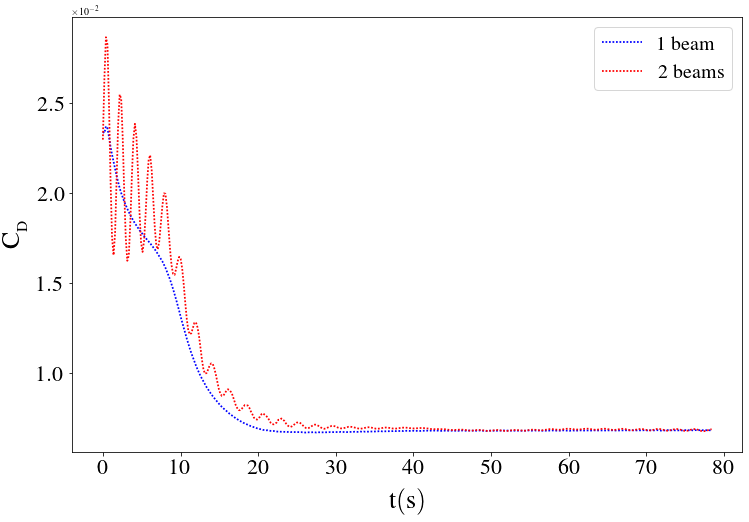

In [637]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1
time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)+0.0003
y2_cd = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

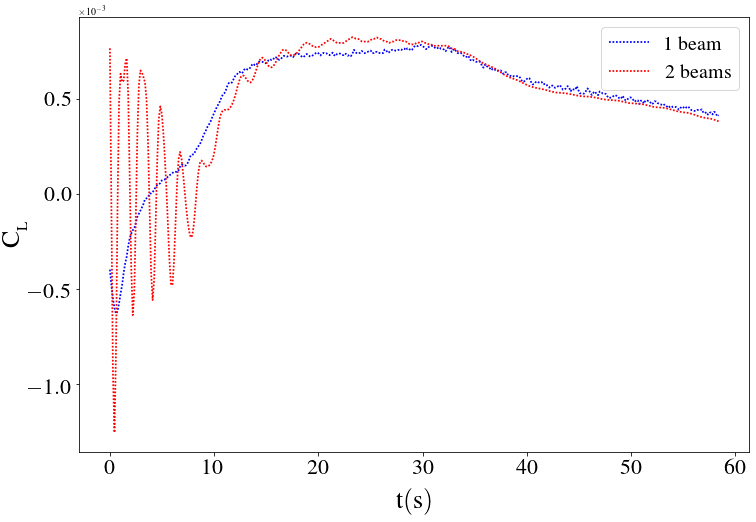

In [638]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

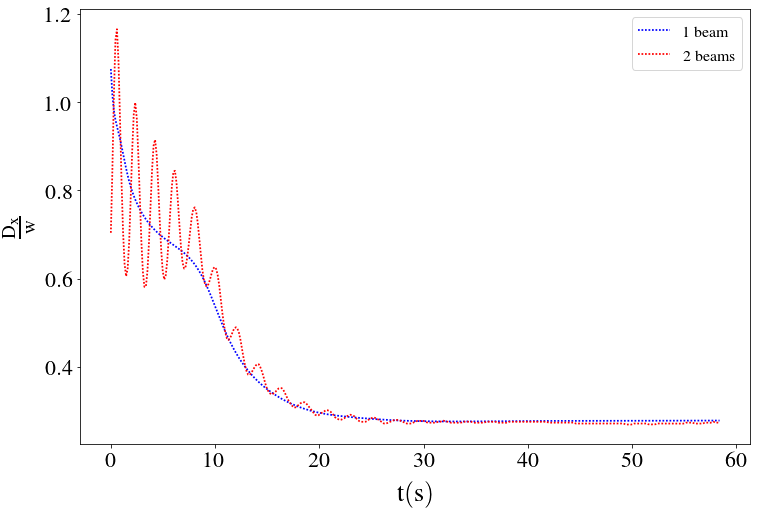

In [639]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.02
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

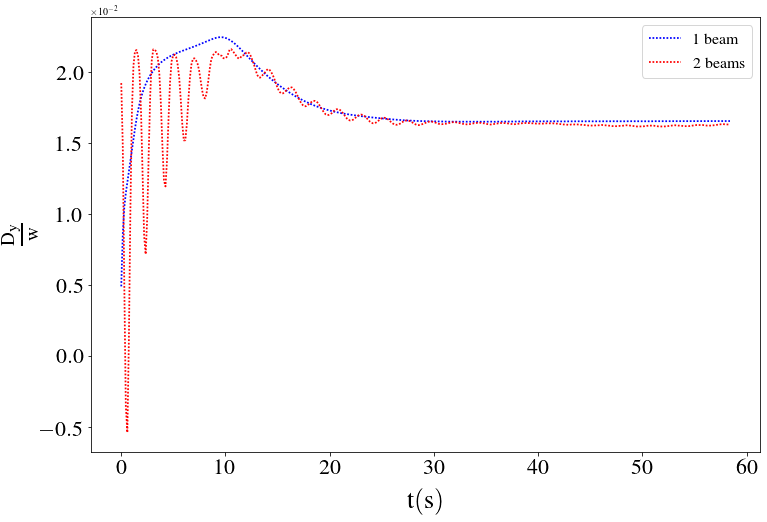

In [640]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.001
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

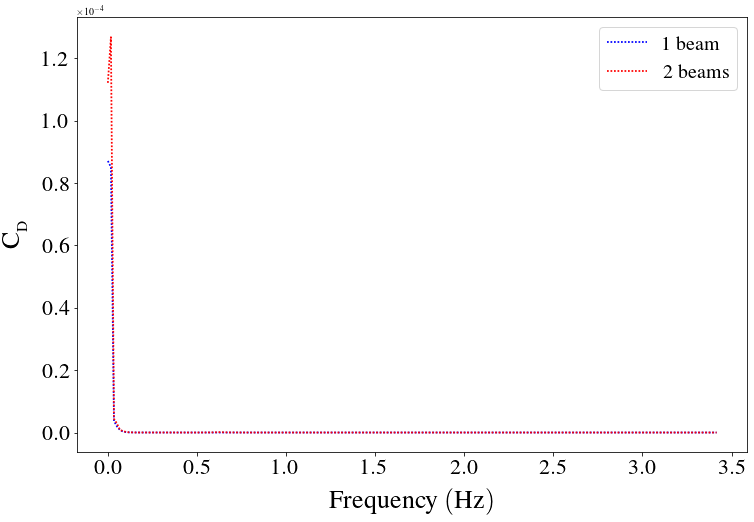

In [641]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

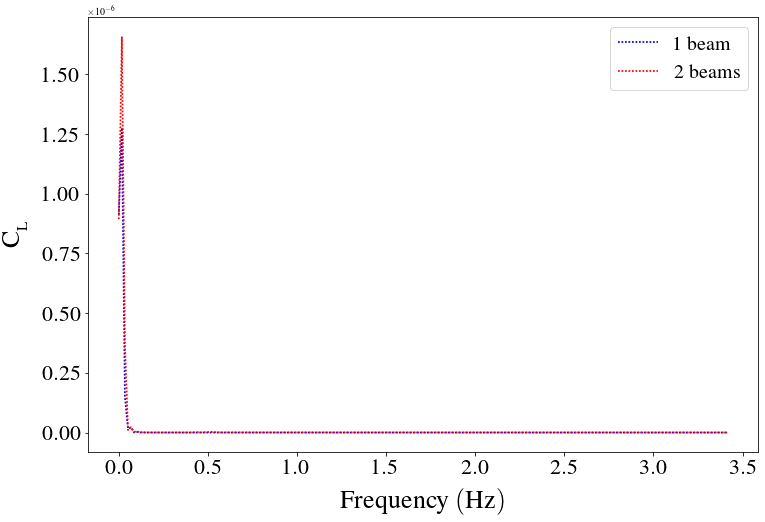

In [642]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [643]:
y1_05_e6_h4_cd = y1_cd
y1_05_e6_h4_cl = y1_cl
y2_05_e6_h4_cd = y2_cd
y2_05_e6_h4_cl = y2_cl

### U20E6H4

In [644]:
print(problems[20])

U20E6H4


In [645]:
problemPath = "{0}/{1}".format(dataPath,problems[20])
figPrefix = "{0}".format(problems[20])
tstep_start =1
U_inf = 2

In [646]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
"""p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_8_1_d  = pd.read_csv('%s/disp-1-8.csv'%problemPath)
p_8_1_fd = pd.read_csv('%s/force-1-8.csv'%problemPath)
p_8_1_fl = pd.read_csv('%s/force-1-8.csv'%problemPath)"""
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_2s = pd.read_csv('%s/2delta-1-2s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)
"""p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)
p_2_2s = pd.read_csv('%s/2delta-2-2s.csv'%problemPath)
p_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)
p_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)
p_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)
p_4_1s = pd.read_csv('%s/2delta-4-1s.csv'%problemPath)
p_4_2s = pd.read_csv('%s/2delta-4-2s.csv'%problemPath)
p_4_10s = pd.read_csv('%s/2delta-4-10s.csv'%problemPath)
p_4_40s = pd.read_csv('%s/2delta-4-40s.csv'%problemPath)
p_4_80s = pd.read_csv('%s/2delta-4-80s.csv'%problemPath)"""

"p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)\np_2_2s = pd.read_csv('%s/2delta-2-2s.csv'%problemPath)\np_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)\np_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)\np_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)\np_4_1s = pd.read_csv('%s/2delta-4-1s.csv'%problemPath)\np_4_2s = pd.read_csv('%s/2delta-4-2s.csv'%problemPath)\np_4_10s = pd.read_csv('%s/2delta-4-10s.csv'%problemPath)\np_4_40s = pd.read_csv('%s/2delta-4-40s.csv'%problemPath)\np_4_80s = pd.read_csv('%s/2delta-4-80s.csv'%problemPath)"

In [647]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
"""p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]
ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)
p_8_1_d = p_8_1_d[['Time','D:0','D:1']]
p_8_1_fd = p_8_1_fd[['p','force:0']]
p_8_1_fl = p_8_1_fl[['p','force:1']]
ddf_8_1 = pd.concat([p_8_1_d, p_8_1_fd], axis=1)
df_8_1 = pd.concat([ddf_8_1, p_8_1_fl], axis=1)"""
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_2s = p_1_2s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]
"""df_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]
df_2_2s = p_2_2s[['arc_length','U:0','U:1','U:2']]
df_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]
df_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]
df_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]
df_4_1s = p_4_1s[['arc_length','U:0','U:1','U:2']]
df_4_2s = p_4_2s[['arc_length','U:0','U:1','U:2']]
df_4_10s = p_4_10s[['arc_length','U:0','U:1','U:2']]
df_4_40s = p_4_40s[['arc_length','U:0','U:1','U:2']]
df_4_80s = p_4_80s[['arc_length','U:0','U:1','U:2']]"""

"df_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]\ndf_2_2s = p_2_2s[['arc_length','U:0','U:1','U:2']]\ndf_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]\ndf_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]\ndf_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]\ndf_4_1s = p_4_1s[['arc_length','U:0','U:1','U:2']]\ndf_4_2s = p_4_2s[['arc_length','U:0','U:1','U:2']]\ndf_4_10s = p_4_10s[['arc_length','U:0','U:1','U:2']]\ndf_4_40s = p_4_40s[['arc_length','U:0','U:1','U:2']]\ndf_4_80s = p_4_80s[['arc_length','U:0','U:1','U:2']]"

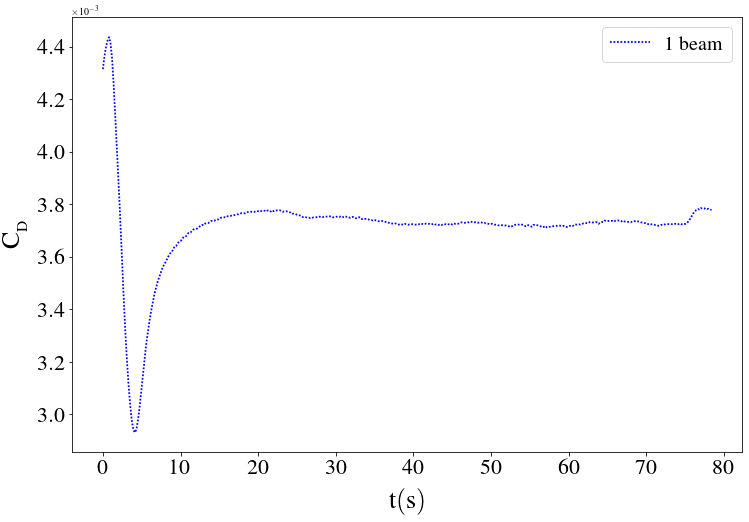

In [648]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

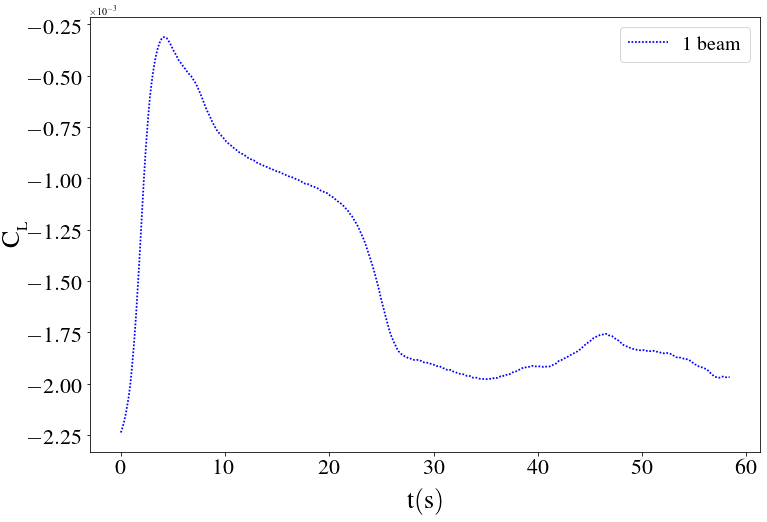

In [649]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

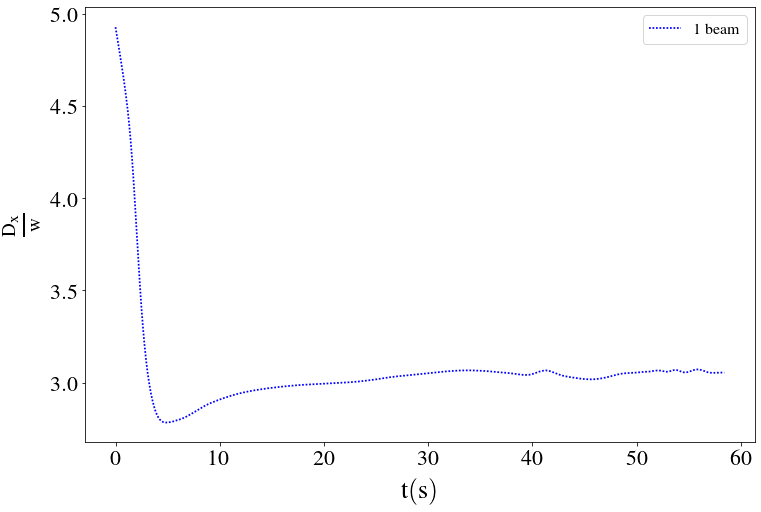

In [650]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.02
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{_{_{}}}}{\\mathrm{w}}$',fontsize=26,labelpad=5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

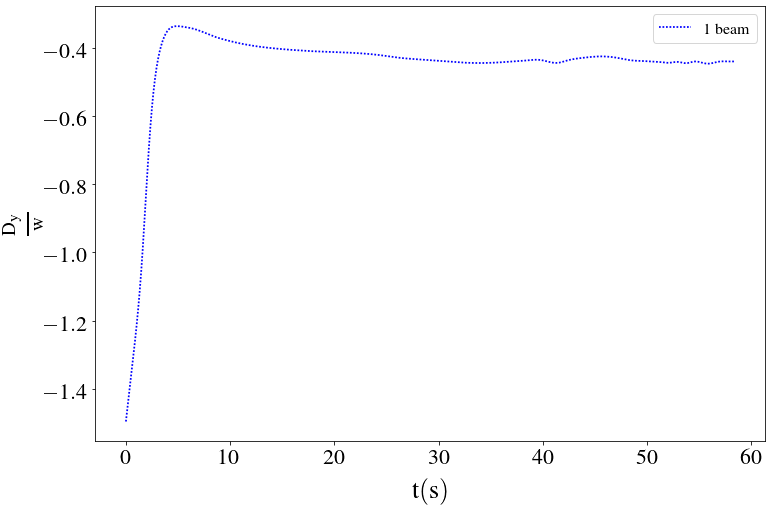

In [651]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.001
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{_{_{}}}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Vortex Shedding

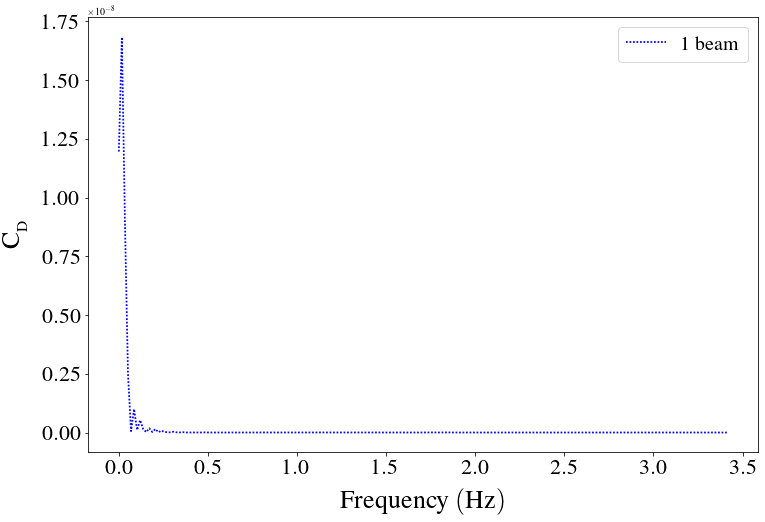

In [652]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

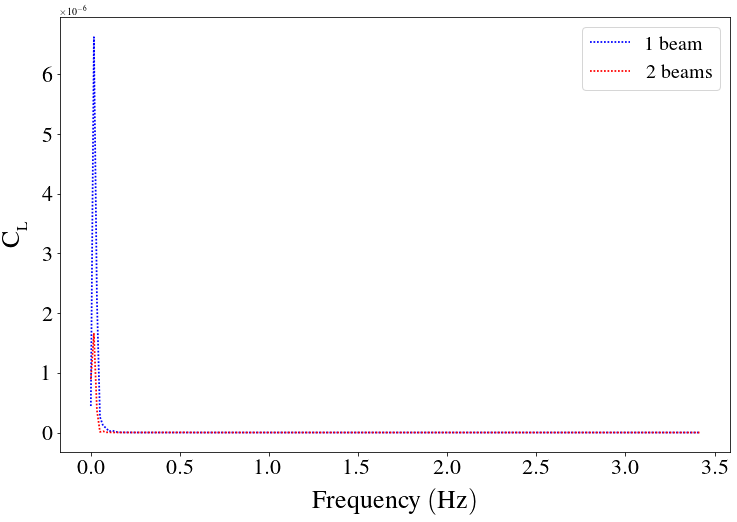

In [653]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [654]:
y1_20_e6_h4_cd = y1_cd
y1_20_e6_h4_cl = y1_cl

### U20E7H4

In [655]:
print(problems[22])

U20E7H4


In [656]:
problemPath = "{0}/{1}".format(dataPath,problems[22])
figPrefix = "{0}".format(problems[22])
tstep_start =1
U_inf = 2

In [657]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
"""p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_8_1_d  = pd.read_csv('%s/disp-1-8.csv'%problemPath)
p_8_1_fd = pd.read_csv('%s/force-1-8.csv'%problemPath)
p_8_1_fl = pd.read_csv('%s/force-1-8.csv'%problemPath)
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_2s = pd.read_csv('%s/2delta-1-2s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)"""
"""p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)
p_2_2s = pd.read_csv('%s/2delta-2-2s.csv'%problemPath)
p_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)
p_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)
p_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)
p_4_1s = pd.read_csv('%s/2delta-4-1s.csv'%problemPath)
p_4_2s = pd.read_csv('%s/2delta-4-2s.csv'%problemPath)
p_4_10s = pd.read_csv('%s/2delta-4-10s.csv'%problemPath)
p_4_40s = pd.read_csv('%s/2delta-4-40s.csv'%problemPath)
p_4_80s = pd.read_csv('%s/2delta-4-80s.csv'%problemPath)"""

"p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)\np_2_2s = pd.read_csv('%s/2delta-2-2s.csv'%problemPath)\np_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)\np_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)\np_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)\np_4_1s = pd.read_csv('%s/2delta-4-1s.csv'%problemPath)\np_4_2s = pd.read_csv('%s/2delta-4-2s.csv'%problemPath)\np_4_10s = pd.read_csv('%s/2delta-4-10s.csv'%problemPath)\np_4_40s = pd.read_csv('%s/2delta-4-40s.csv'%problemPath)\np_4_80s = pd.read_csv('%s/2delta-4-80s.csv'%problemPath)"

In [658]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
"""p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]
ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)
p_8_1_d = p_8_1_d[['Time','D:0','D:1']]
p_8_1_fd = p_8_1_fd[['p','force:0']]
p_8_1_fl = p_8_1_fl[['p','force:1']]
ddf_8_1 = pd.concat([p_8_1_d, p_8_1_fd], axis=1)
df_8_1 = pd.concat([ddf_8_1, p_8_1_fl], axis=1)
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_2s = p_1_2s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]
df_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]
df_2_2s = p_2_2s[['arc_length','U:0','U:1','U:2']]
df_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]
df_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]
df_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]
df_4_1s = p_4_1s[['arc_length','U:0','U:1','U:2']]
df_4_2s = p_4_2s[['arc_length','U:0','U:1','U:2']]
df_4_10s = p_4_10s[['arc_length','U:0','U:1','U:2']]
df_4_40s = p_4_40s[['arc_length','U:0','U:1','U:2']]
df_4_80s = p_4_80s[['arc_length','U:0','U:1','U:2']]"""

"p_4_1_d = p_4_1_d[['Time','D:0','D:1']]\np_4_1_fd = p_4_1_fd[['p','force:0']]\np_4_1_fl = p_4_1_fl[['p','force:1']]\nddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)\ndf_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)\np_8_1_d = p_8_1_d[['Time','D:0','D:1']]\np_8_1_fd = p_8_1_fd[['p','force:0']]\np_8_1_fl = p_8_1_fl[['p','force:1']]\nddf_8_1 = pd.concat([p_8_1_d, p_8_1_fd], axis=1)\ndf_8_1 = pd.concat([ddf_8_1, p_8_1_fl], axis=1)\ndf_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]\ndf_1_2s = p_1_2s[['arc_length','U:0','U:1','U:2']]\ndf_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]\ndf_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]\ndf_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]\ndf_2_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]\ndf_2_2s = p_2_2s[['arc_length','U:0','U:1','U:2']]\ndf_2_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]\ndf_2_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]\ndf_2_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]\ndf_4_1s = p_4_1s[['arc_length','U:0

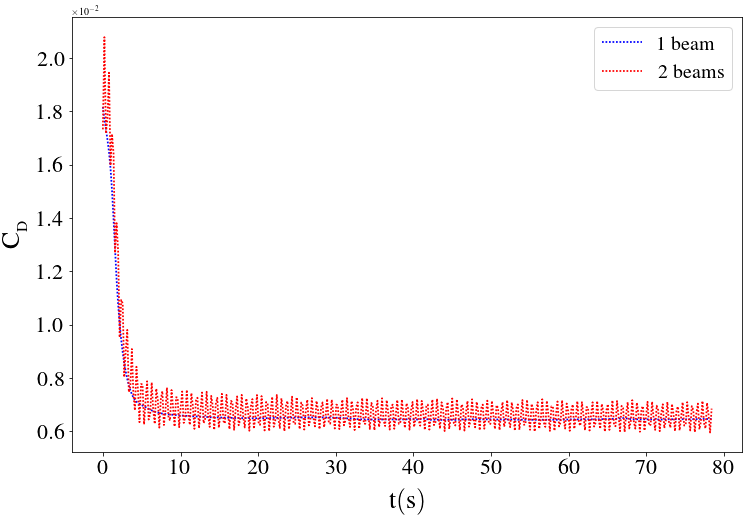

In [659]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1
time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)+0.0003
y2_cd = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

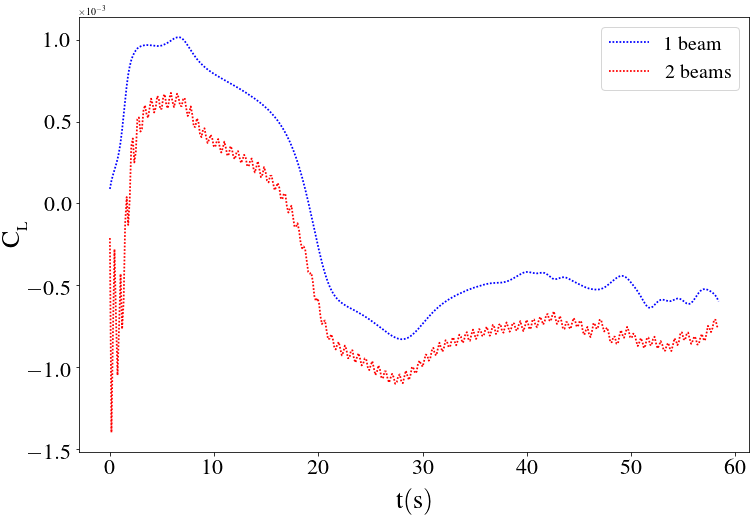

In [660]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

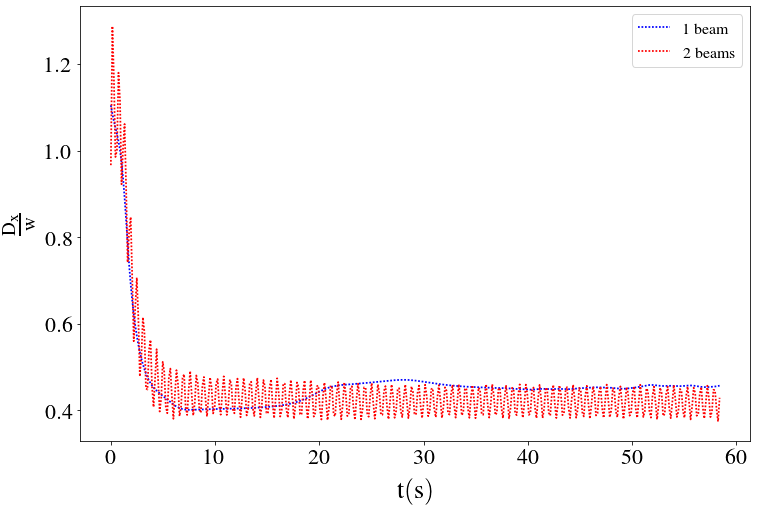

In [661]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.02
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

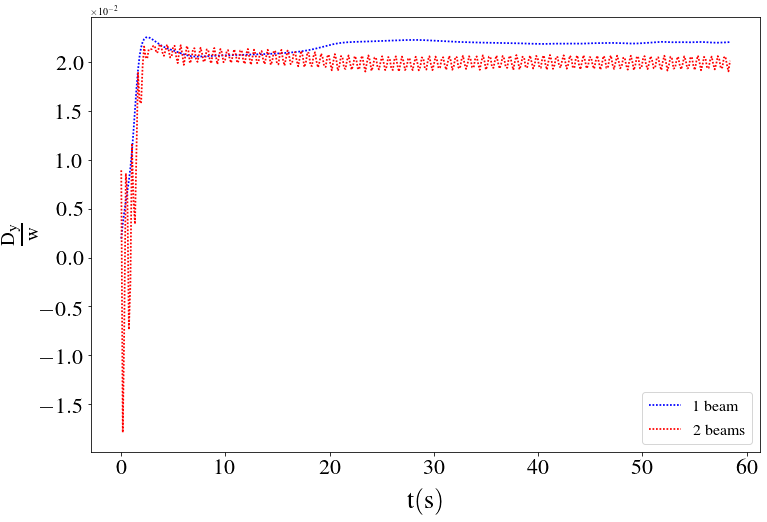

In [662]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.001
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

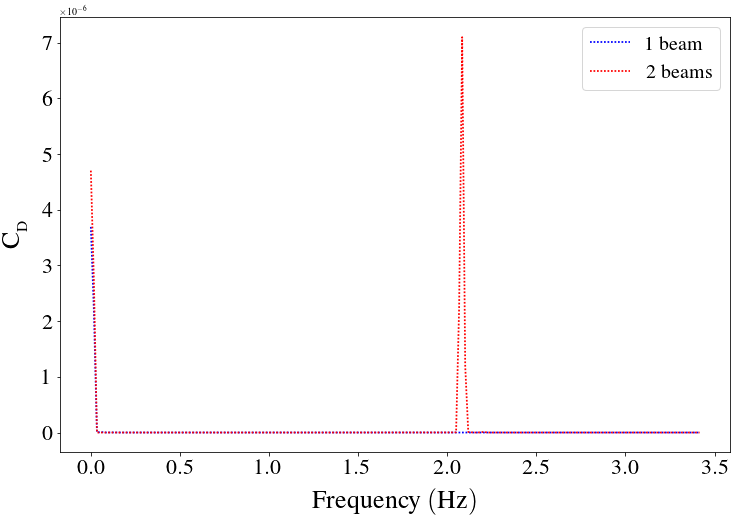

In [663]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

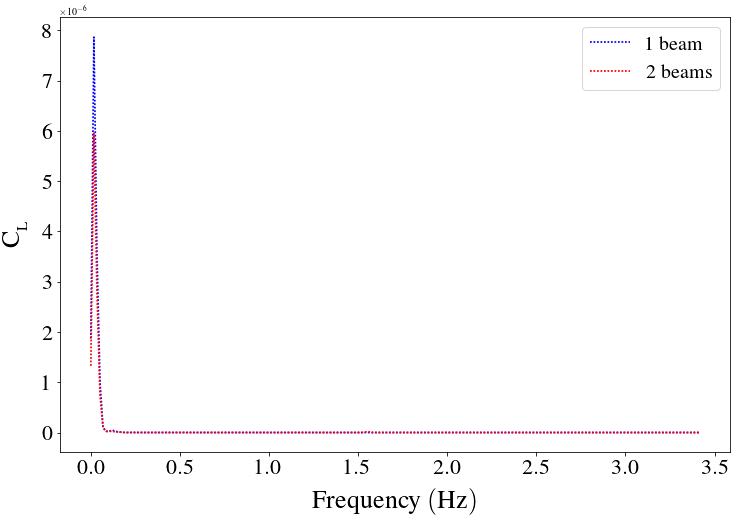

In [664]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [665]:
y1_20_e7_h4_cd = y1_cd
y1_20_e7_h4_cl = y1_cl
y2_20_e7_h4_cd = y2_cd
y2_20_e7_h4_cl = y2_cl

### U05E7H4

In [666]:
print(problems[12])

U05E7H4


In [668]:
problemPath = "{0}/{1}".format(dataPath,problems[12])
figPrefix = "{0}".format(problems[12])
tstep_start = 3
U_inf = 0.5

In [669]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
"""p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)"""
p_1_1s = pd.read_csv('%s/2delta-1-1s.csv'%problemPath)
p_1_10s = pd.read_csv('%s/2delta-1-10s.csv'%problemPath)
p_1_40s = pd.read_csv('%s/2delta-1-40s.csv'%problemPath)
p_1_80s = pd.read_csv('%s/2delta-1-80s.csv'%problemPath)
p_2_1s = pd.read_csv('%s/2delta-2-1s.csv'%problemPath)
p_2_10s = pd.read_csv('%s/2delta-2-10s.csv'%problemPath)
p_2_40s = pd.read_csv('%s/2delta-2-40s.csv'%problemPath)
p_2_80s = pd.read_csv('%s/2delta-2-80s.csv'%problemPath)

In [670]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
df_1_1s = p_1_1s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_1_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_1_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_1_80s[['arc_length','U:0','U:1','U:2']]
df_1_1s = p_2_1s[['arc_length','U:0','U:1','U:2']]
df_1_10s = p_2_10s[['arc_length','U:0','U:1','U:2']]
df_1_40s = p_2_40s[['arc_length','U:0','U:1','U:2']]
df_1_80s = p_2_80s[['arc_length','U:0','U:1','U:2']]

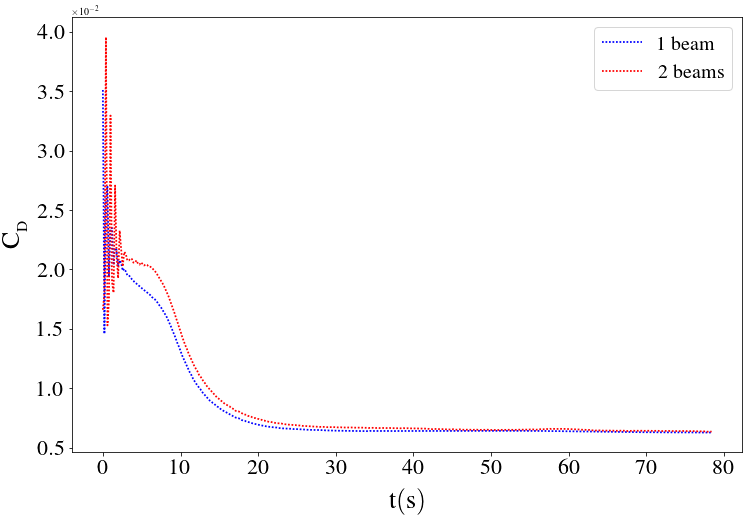

In [671]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1
time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)
y2_cd = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

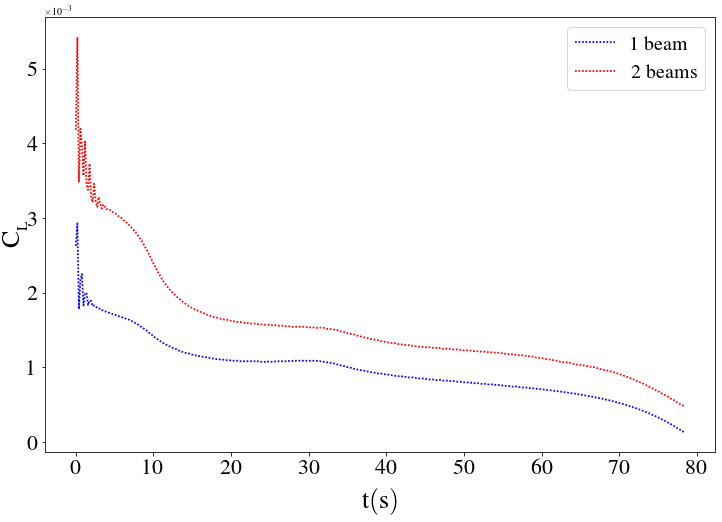

In [672]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=400
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

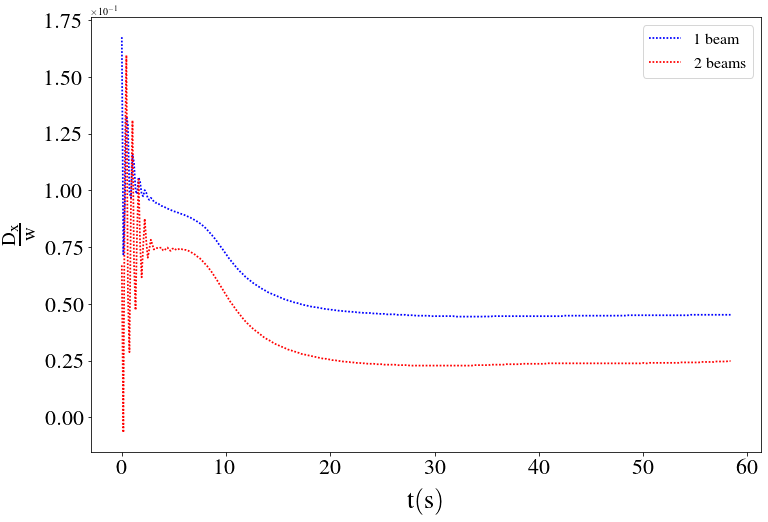

In [673]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.02
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

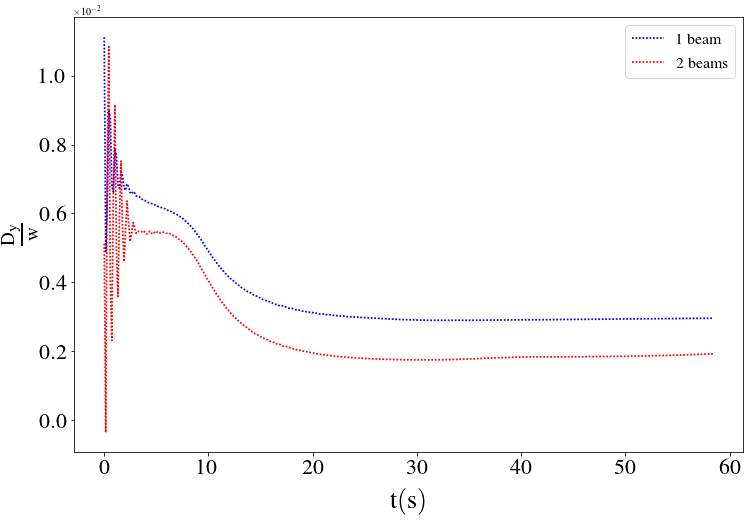

In [674]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)+0.001
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

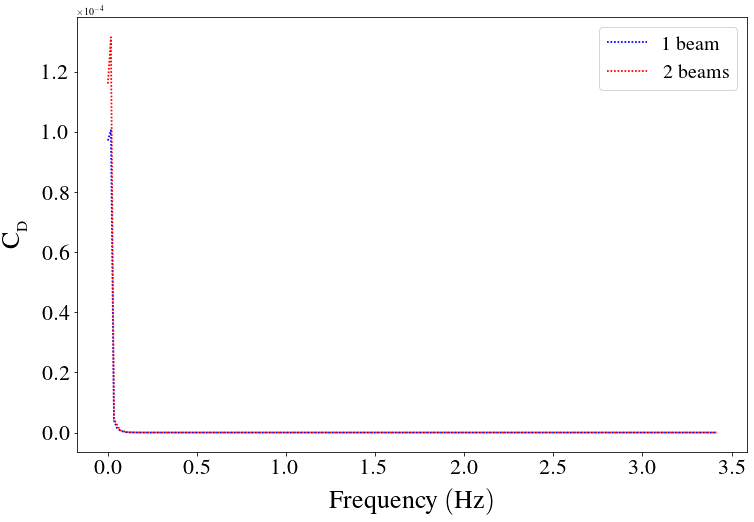

In [675]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

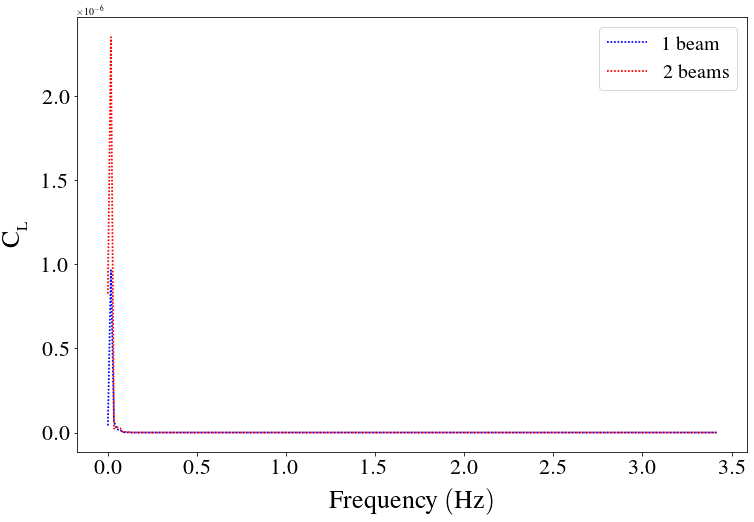

In [676]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [677]:
y1_05_e7_h4_cd = y1_cd
y1_05_e7_h4_cl = y1_cl
y2_05_e7_h4_cd = y2_cd
y2_05_e7_h4_cl = y2_cl

# Comparisons

## number of beam (1) and $\frac{h}{H}=0.33$ constant - Effect of Re and E:

## $\mathrm{C_{_D}}$

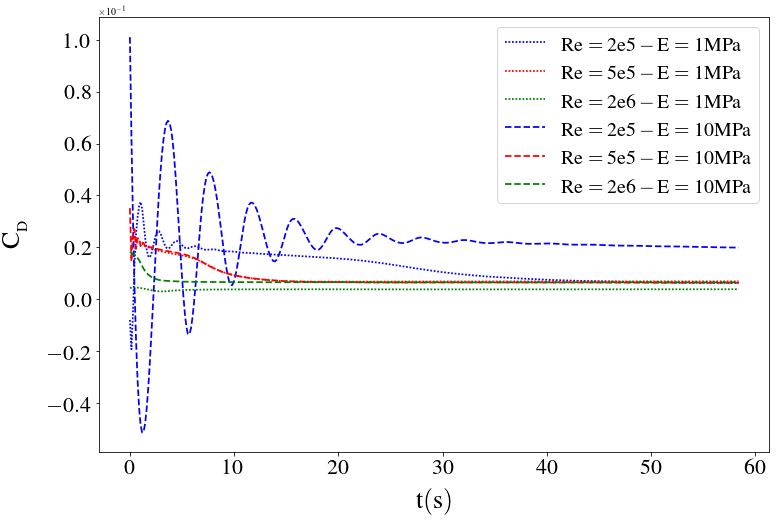

In [678]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_02_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_05_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_20_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_02_e7_h4_cd, linestyle="--", linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_05_e7_h4_cd, linestyle="--", linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_20_e7_h4_cd, linestyle="--", linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 10 MPa}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CDs_1beam_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## $\mathrm{C_{_L}}$

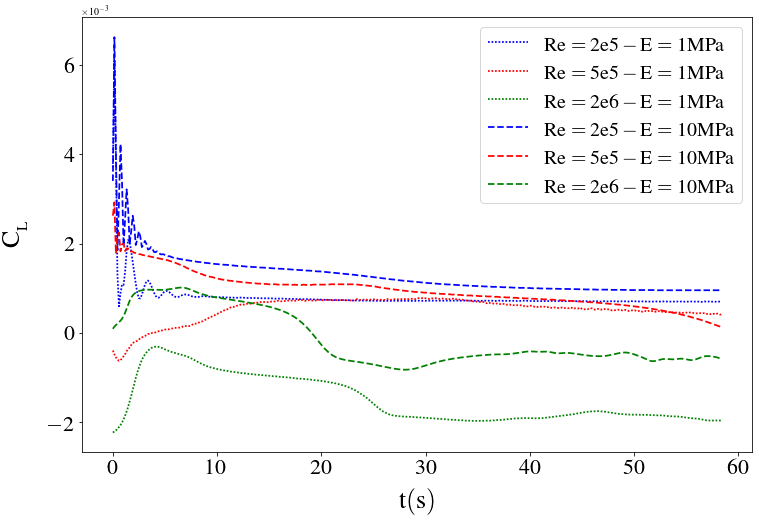

In [679]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_02_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_05_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_20_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_02_e7_h4_cl, linestyle="--", linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_05_e7_h4_cl, linestyle="--", linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_20_e7_h4_cl, linestyle="--", linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 10 MPa}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CLs_1beam_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## number of beam (1), $\frac{h}{H}=0.33$ and Re (5e5)constant - Effect of E:

## $\mathrm{C_{_D}}$

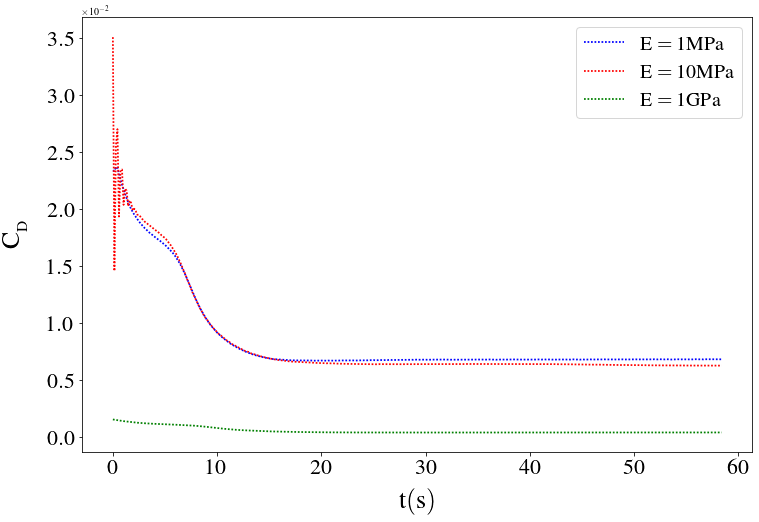

In [680]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_05_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{E = 1 MPa}$")
    ax.plot(time_smooth,y1_05_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{E = 10 MPa}$")
    ax.plot(time_smooth,y1_05_e9_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{E = 1 GPa}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CDs_1beam_E_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## $\mathrm{C_{_L}}$

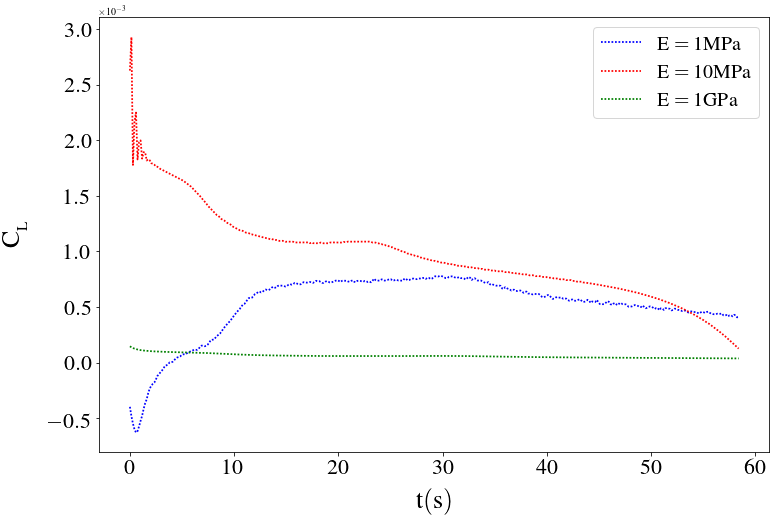

In [681]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_05_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{E = 1 MPa}$")
    ax.plot(time_smooth,y1_05_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{E = 10 MPa}$")
    ax.plot(time_smooth,y1_05_e9_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{E = 1 GPa}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CLs_1beam_E_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## number of beam (2) and $\frac{h}{H}=0.33$ and E (10 Mpa) constant - Effect of Re:

## $\mathrm{C_{_D}}$

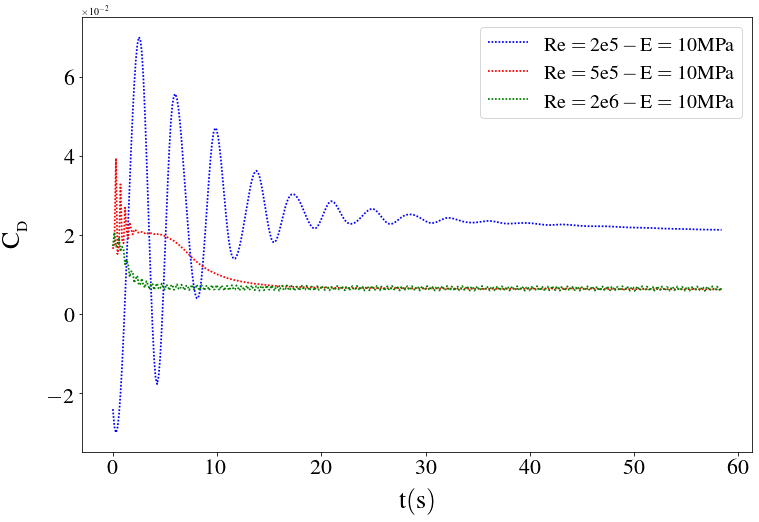

In [682]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y2_02_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y2_05_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y2_20_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 10 MPa}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CDs_2beams_E7_H4_Re_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## $\mathrm{C_{_L}}$

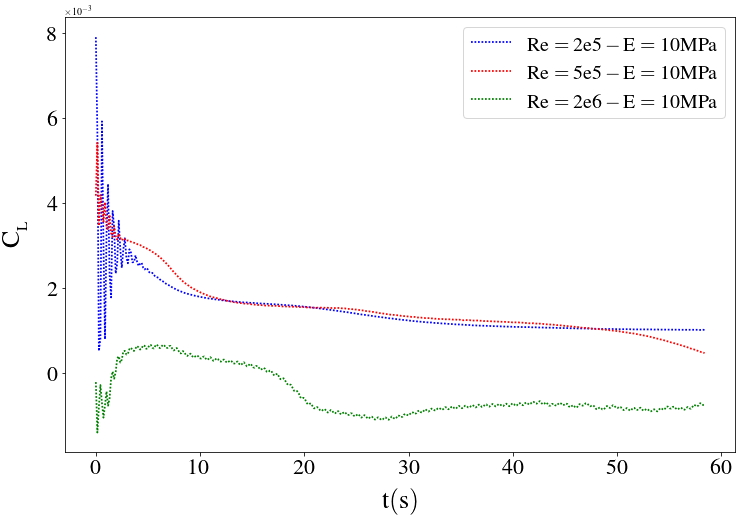

In [683]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y2_02_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y2_05_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y2_20_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 10 MPa}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CLs_2beams_E7_H4_Re_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## number of beam (2) and $\frac{h}{H}=0.33$ and Re (5e5) constant - Effect of E:

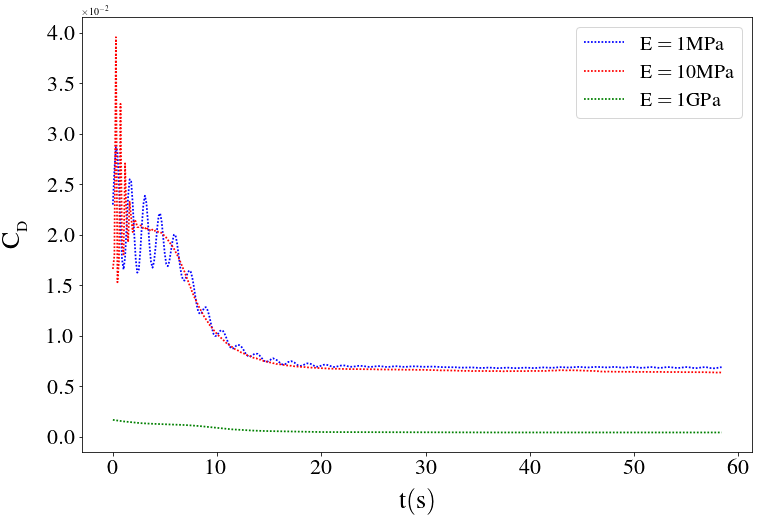

In [684]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y2_05_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{E = 1 MPa}$")
    ax.plot(time_smooth,y2_05_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{E = 10 MPa}$")
    ax.plot(time_smooth,y2_05_e9_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{E = 1 GPa}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CDs_2beams_E_H4_Re_5e5+%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

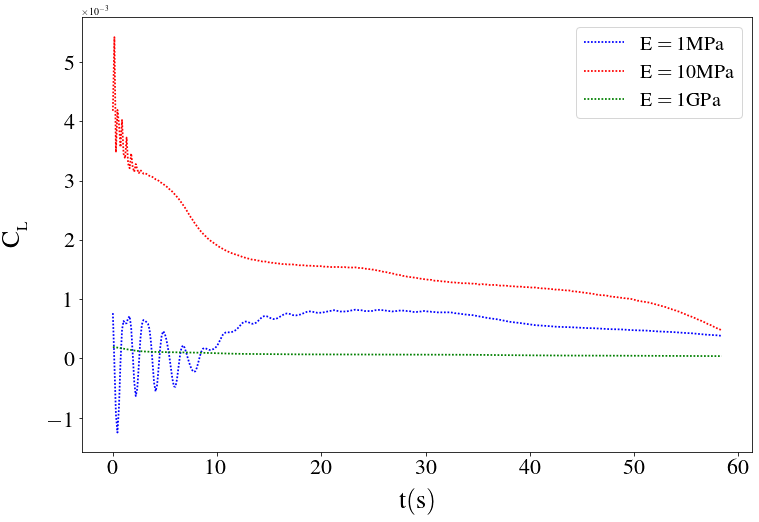

In [685]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y2_05_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{E = 1 MPa}$")
    ax.plot(time_smooth,y2_05_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{E = 10 MPa}$")
    ax.plot(time_smooth,y2_05_e9_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{E = 1 GPa}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CLs_2beams_E_H4_Re_5e5+%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## E (10 Mpa) and Re (2e5) constant - Effect of beam height and number of beams:

## $\mathrm{C_{_D}}$

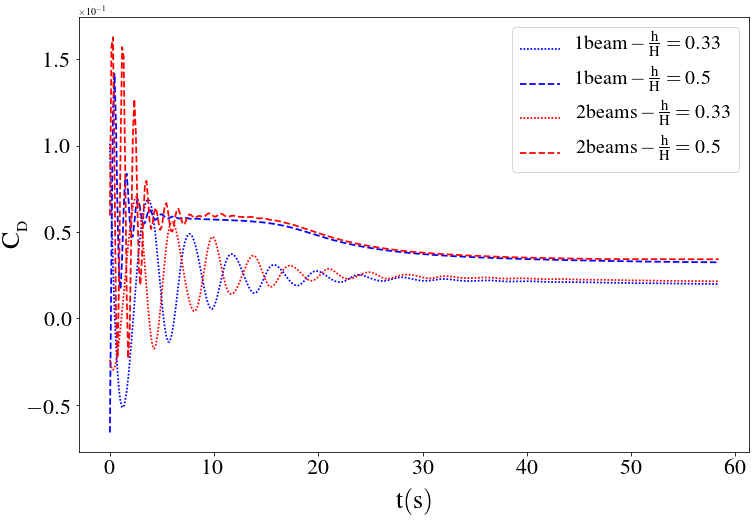

In [686]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_02_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 beam - \\frac{h}{H}=0.33}$")
    ax.plot(time_smooth,y1_02_e7_h6_cd, linestyle="--", linewidth=1.75, color=cols[0],label="$\\mathrm{1 beam - \\frac{h}{H}=0.5}$")
    ax.plot(time_smooth,y2_02_e7_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 beams - \\frac{h}{H}=0.33}$")
    ax.plot(time_smooth,y2_02_e7_h6_cd, linestyle="--", linewidth=1.75, color=cols[1],label="$\\mathrm{2 beams - \\frac{h}{H}=0.5}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CDs_2beam_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## $\mathrm{C_{_L}}$

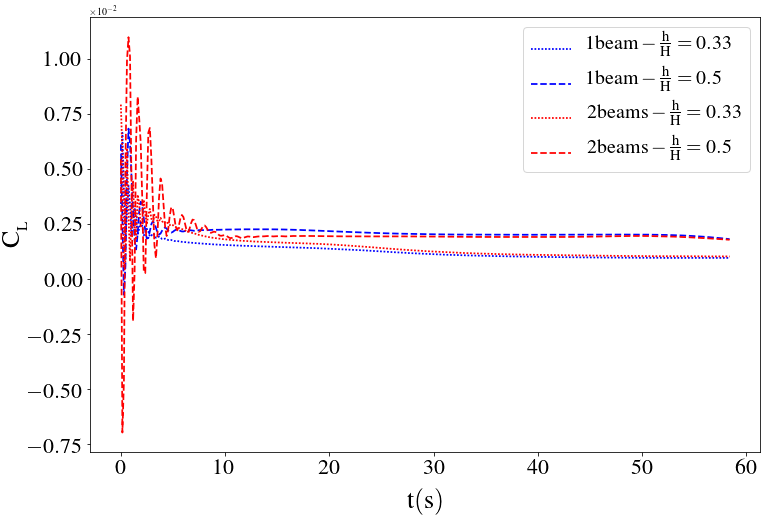

In [687]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_02_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 beam - \\frac{h}{H}=0.33}$")
    ax.plot(time_smooth,y1_02_e7_h6_cl, linestyle="--", linewidth=1.75, color=cols[0],label="$\\mathrm{1 beam - \\frac{h}{H}=0.5}$")
    ax.plot(time_smooth,y2_02_e7_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 beams - \\frac{h}{H}=0.33}$")
    ax.plot(time_smooth,y2_02_e7_h6_cl, linestyle="--", linewidth=1.75, color=cols[1],label="$\\mathrm{2 beams - \\frac{h}{H}=0.5}$")
    
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CLs_2beam_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [ ]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_02_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_05_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_20_e6_h4_cd, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_02_e7_h4_cd, linestyle="--", linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_05_e7_h4_cd, linestyle="--", linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_20_e7_h4_cd, linestyle="--", linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 10 MPa}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CDs_1beam_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [ ]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
linestyles = [('densely dotted',(0, (1, 1)))]
for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_02_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_05_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_20_e6_h4_cl, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 1 MPa}$")
    ax.plot(time_smooth,y1_02_e7_h4_cl, linestyle="--", linewidth=1.75, color=cols[0],label="$\\mathrm{Re = 2e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_05_e7_h4_cl, linestyle="--", linewidth=1.75, color=cols[1],label="$\\mathrm{Re = 5e5 - E = 10 MPa}$")
    ax.plot(time_smooth,y1_20_e7_h4_cl, linestyle="--", linewidth=1.75, color=cols[2],label="$\\mathrm{Re = 2e6 - E = 10 MPa}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CLs_1beam_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [ ]:
y2_

### U02E12H4

In [560]:
print(problems[6])

U02E12H4


In [561]:
problemPath = "{0}/{1}".format(dataPath,problems[6])
figPrefix = "{0}".format(problems[6])
tstep_start=0
tstep_end = 80

In [562]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
"""p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)"""

"p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)\np_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)\np_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)"

In [563]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
"""p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]"""
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
"""ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)"""

'ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)\ndf_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)'

## Drag Coefficient

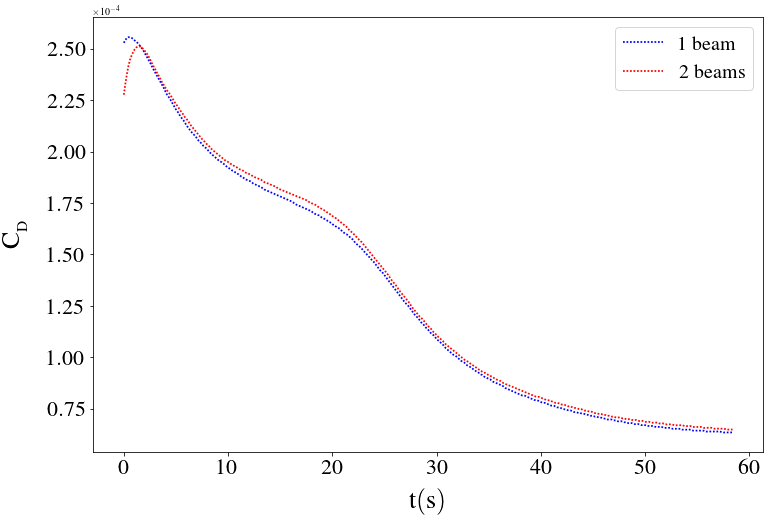

In [564]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)
y2_cd = f2(time_smooth)*0.93

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ drag \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Lift Coefficient

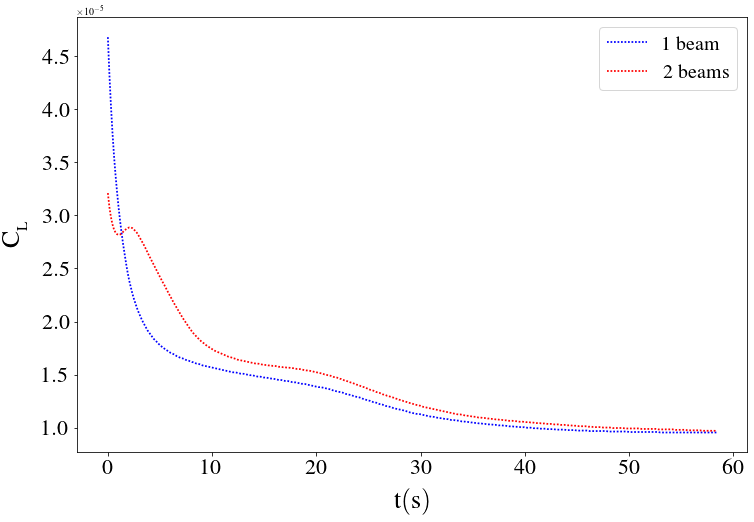

In [565]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1
time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)*0.95

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

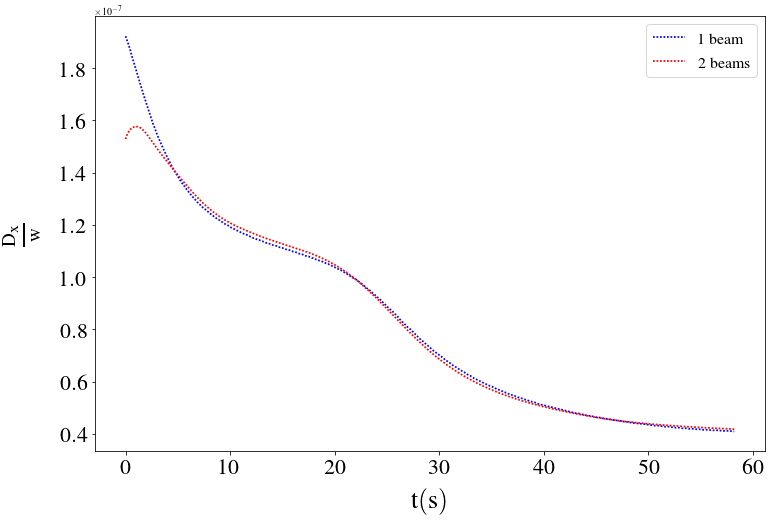

In [566]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)*0.93

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{_{_{}}}}{\\mathrm{w}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

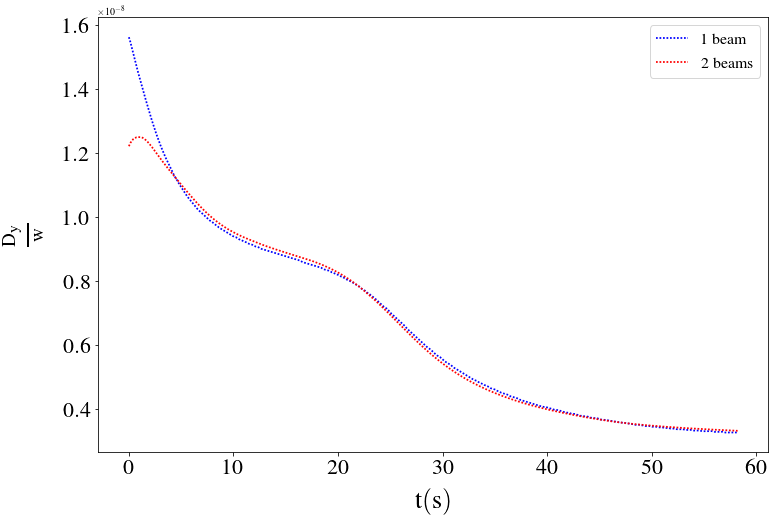

In [567]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)*0.93

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{_{_{}}}}{\\mathrm{w}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Vortex Shedding

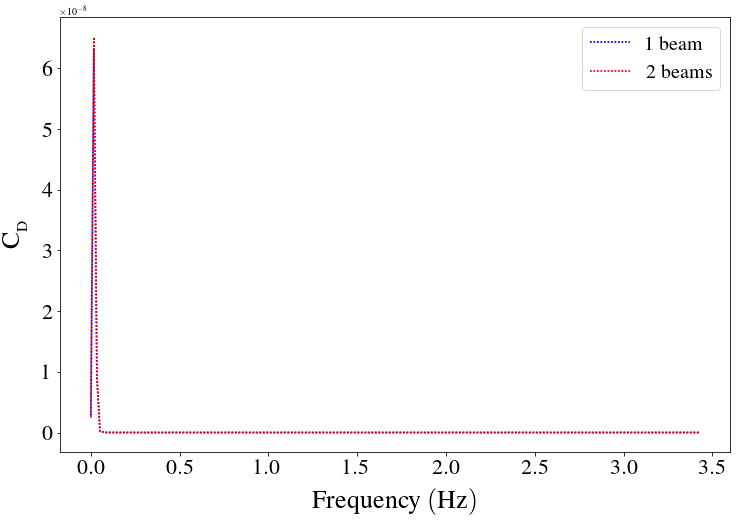

In [568]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

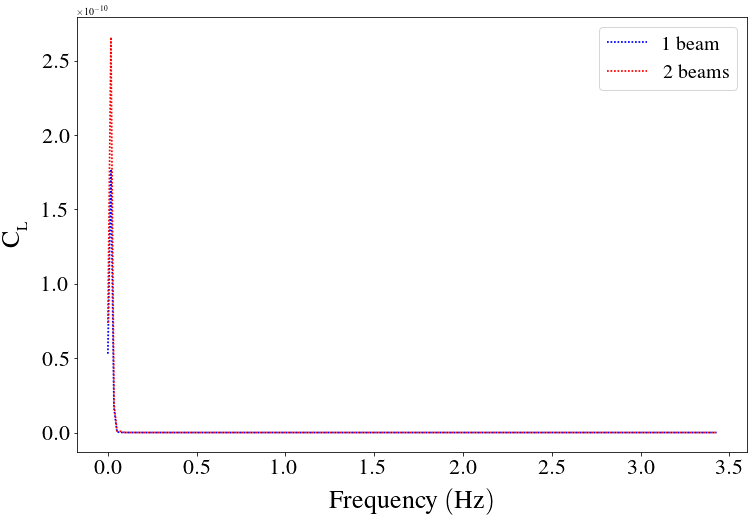

In [569]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [570]:
y1_02_e12_h4_cd = y1_cd
y1_02_e12_h4_cl = y1_cl
y2_02_e12_h4_cd = y2_cd
y2_02_e12_h4_cl = y2_cl

# U05E9H4

In [571]:
print(problems[14])

U05E9H4


In [572]:
problemPath = "{0}/{1}".format(dataPath,problems[14])
figPrefix = "{0}".format(problems[14])
tstep_start = 1

In [573]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_2_1_d  = pd.read_csv('%s/disp-1-2.csv'%problemPath)
p_2_1_fd = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_2_1_fl = pd.read_csv('%s/force-1-2.csv'%problemPath)
p_4_1_d  = pd.read_csv('%s/disp-1-4.csv'%problemPath)
p_4_1_fd = pd.read_csv('%s/force-1-4.csv'%problemPath)
p_4_1_fl = pd.read_csv('%s/force-1-4.csv'%problemPath)

In [574]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)
p_2_1_d = p_2_1_d[['Time','D:0','D:1']]
p_2_1_fd = p_2_1_fd[['p','force:0']]
p_2_1_fl = p_2_1_fl[['p','force:1']]
ddf_2_1 = pd.concat([p_2_1_d, p_2_1_fd], axis=1)
df_2_1 = pd.concat([ddf_2_1, p_2_1_fl], axis=1)
p_4_1_d = p_4_1_d[['Time','D:0','D:1']]
p_4_1_fd = p_4_1_fd[['p','force:0']]
p_4_1_fl = p_4_1_fl[['p','force:1']]
ddf_4_1 = pd.concat([p_4_1_d, p_4_1_fd], axis=1)
df_4_1 = pd.concat([ddf_4_1, p_4_1_fl], axis=1)

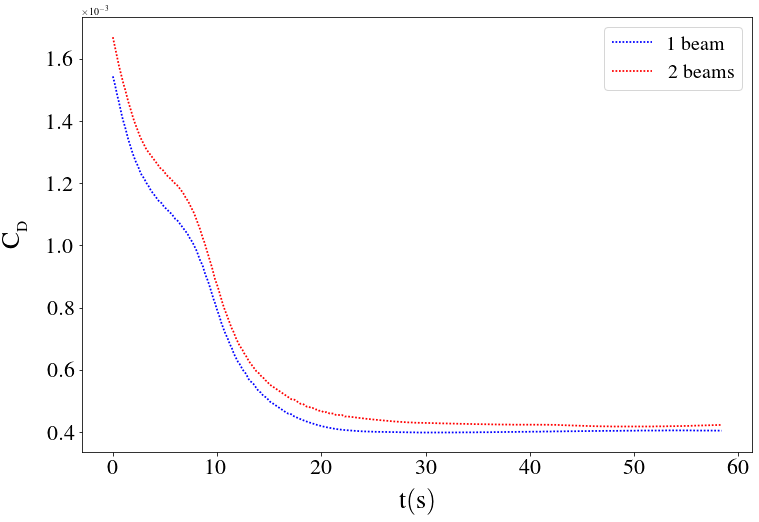

In [575]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:0']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CD_2_1 = numer_drag_2_1/denom_2_1
numer_drag_4_1 = 2*h_beam*df_4_1['force:0']
denom_4_1 = rho_f*(U_inf*((h_beam-p_4_1_d['D:1'])**2)/2/h_channel)**2
CD_4_1 = numer_drag_4_1/denom_4_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CD_2_1[tstep_start:tstep_end],kind= "cubic")
#f4 = interpolate.interp1d(time, CD_4_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)
y2_cd = f2(time_smooth)
y4_cd = f4(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cd, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
#ax.plot(time_smooth,y4_cd-0.001, linestyle=linestyle, linewidth=1.75, color=cols[2],label="$\\mathrm{4 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ drag \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Lift Coefficient

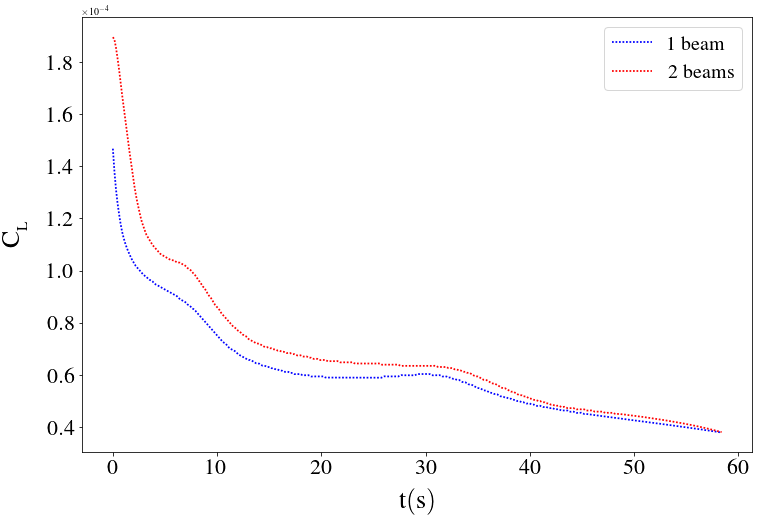

In [576]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

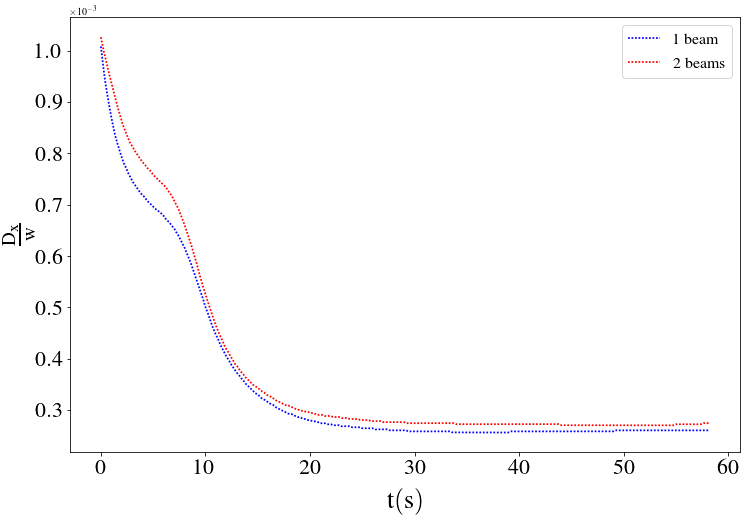

In [577]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

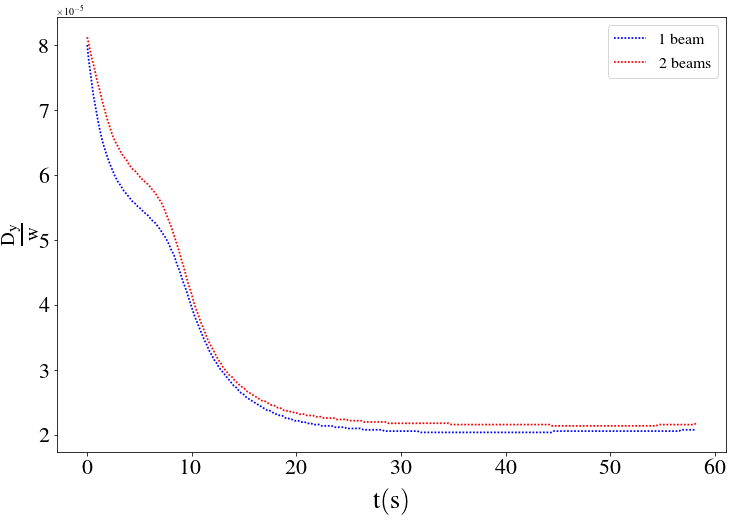

In [578]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Vortex Shedding

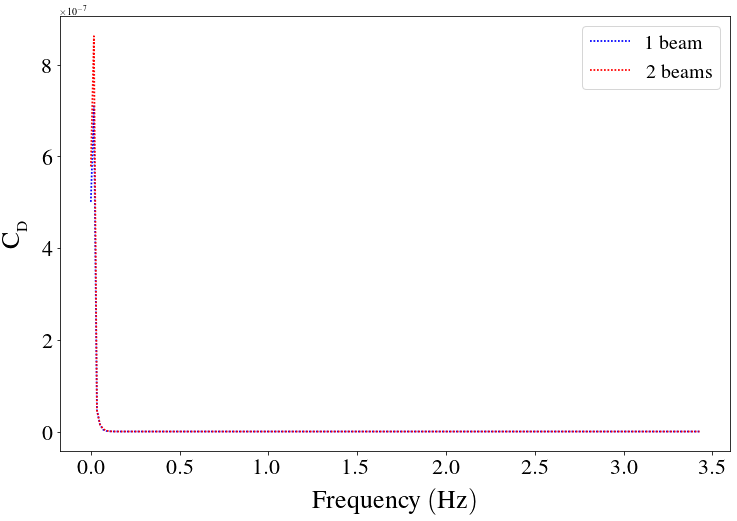

In [579]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")    
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

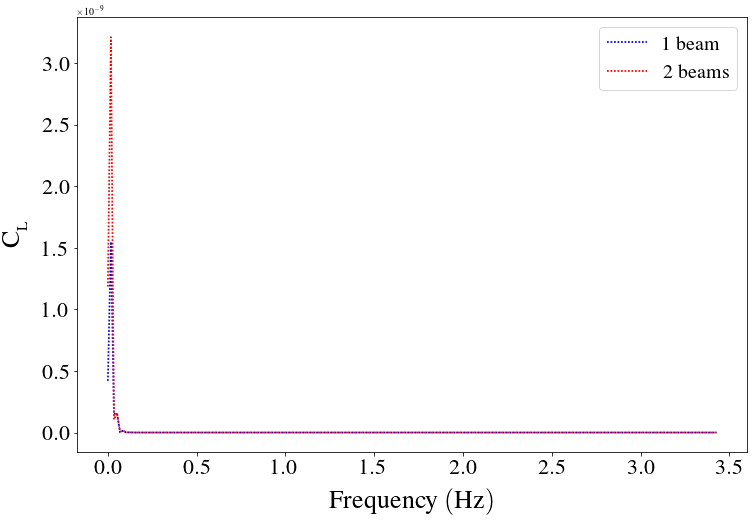

In [580]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [581]:
y1_05_e9_h4_cd = y1_cd
y1_05_e9_h4_cl = y1_cl
y2_05_e9_h4_cd = y2_cd
y2_05_e9_h4_cl = y2_cl

# U02E9H4

In [692]:
print(problems[4])

U02E9H4


In [693]:
problemPath = "{0}/{1}".format(dataPath,problems[4])
figPrefix = "{0}".format(problems[4])
tstep_start = 1

In [694]:
p_1_1_d  = pd.read_csv('%s/disp-1-1.csv'%problemPath)
p_1_1_fd = pd.read_csv('%s/force-1-1.csv'%problemPath)
p_1_1_fl = pd.read_csv('%s/force-1-1.csv'%problemPath)

In [695]:
p_1_1_d = p_1_1_d[['Time','D:0','D:1']]
p_1_1_fd = p_1_1_fd[['p','force:0']]
p_1_1_fl = p_1_1_fl[['p','force:1']]
ddf_1_1 = pd.concat([p_1_1_d, p_1_1_fd], axis=1)
df_1_1 = pd.concat([ddf_1_1, p_1_1_fl], axis=1)

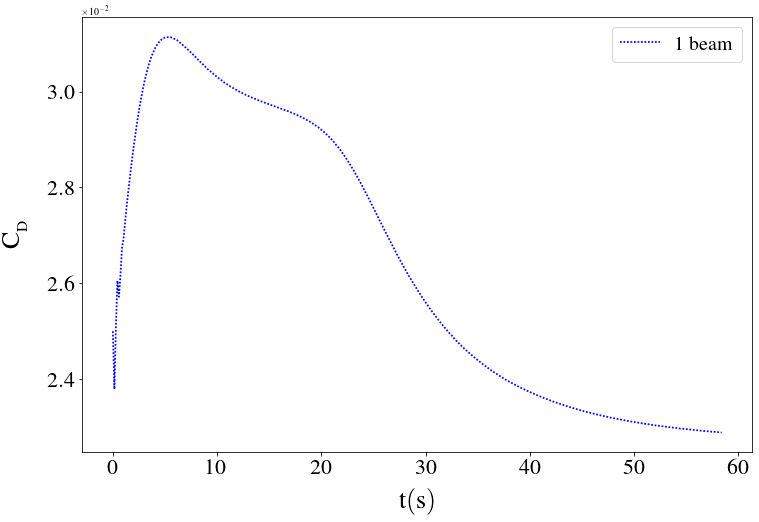

In [696]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT

linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:0']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CD_1_1 = numer_drag_1_1/denom_1_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CD_1_1[tstep_start:tstep_end],kind= "cubic")

y1_cd = f1(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cd, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ drag \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CD_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Lift Coefficient

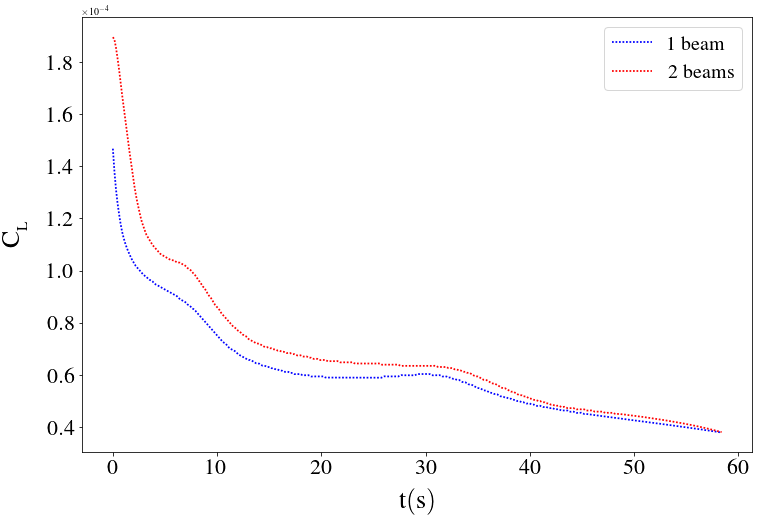

In [576]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=7
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]
numer_drag_1_1 = 2*h_beam*df_1_1['force:1']
denom_1_1 = rho_f*(U_inf*((h_beam-p_1_1_d['D:1'])**2)/2/h_channel)**2
CL_1_1 = numer_drag_1_1/denom_1_1
numer_drag_2_1 = 2*h_beam*df_2_1['force:1']
denom_2_1 = rho_f*(U_inf*((h_beam-p_2_1_d['D:1'])**2)/2/h_channel)**2
CL_2_1 = numer_drag_2_1/denom_2_1

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, CL_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, CL_2_1[tstep_start:tstep_end],kind= "cubic")

y1_cl = f1(time_smooth)
y2_cl = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1_cl, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2_cl, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")
ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=15)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ lift \ coefficient \ of \ the \ first \ beam}$',fontsize=22)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/CL_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

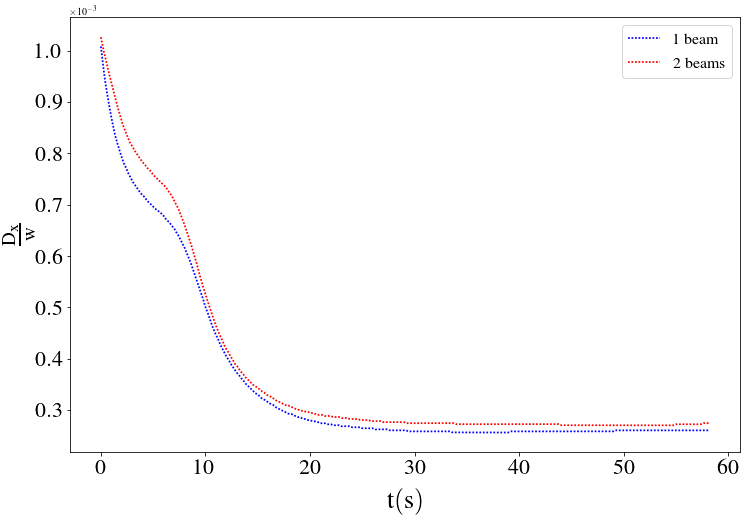

In [577]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:0']/w_plate
d_2_1 = df_2_1['D:0']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{x}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_x)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dx_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

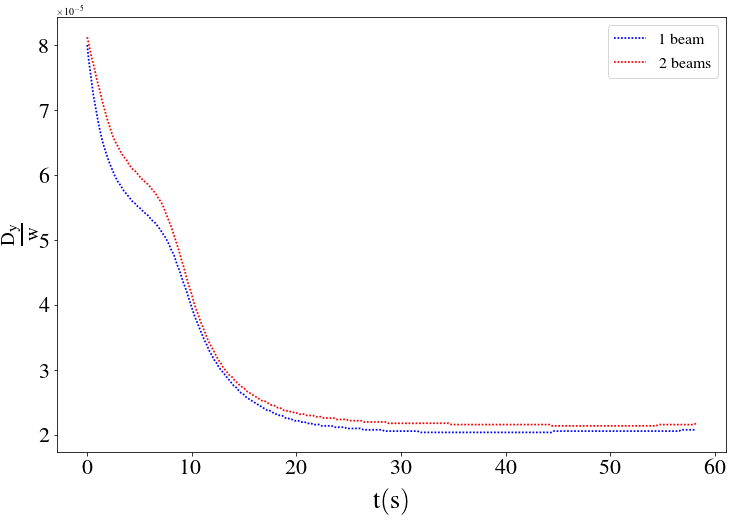

In [578]:
from scipy import interpolate
fig, ax = plt.subplots(1,1,figsize=(12,8))
cols=['b','r','g','m']
tstep_start=8
tstep_end=300
dT = 0.2
time = df_1_1['Time'][tstep_start:tstep_end]
time -= tstep_start*dT
linestyles = [('densely dotted',(0, (1, 1)))]


d_1_1 = df_1_1['D:1']/w_plate
d_2_1 = df_2_1['D:1']/w_plate

time_smooth = np.linspace(time.values[0],time.values[-1],400)

f1 = interpolate.interp1d(time, d_1_1[tstep_start:tstep_end],kind= "cubic")
f2 = interpolate.interp1d(time, d_2_1[tstep_start:tstep_end],kind= "cubic")

y1 = f1(time_smooth)
y2 = f2(time_smooth)

for i, (name, linestyle) in enumerate(linestyles):
    ax.plot(time_smooth,y1, linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")
ax.plot(time_smooth,y2, linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")

ax.set_xlabel('$ \\mathrm{t(s)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\frac{\\mathrm{D_{y}}_{}}{\\mathrm{w}}$',fontsize=26,labelpad=-5)
#ax.set_title('$ \\mathrm{Time \ history \ of \ the \ tip \ deflection \ of \ the \ first \ beam \ (D_y)}$',fontsize=16)
ax.legend(fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))

plt.show()
fig.savefig('%s/Dy_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

## Vortex Shedding

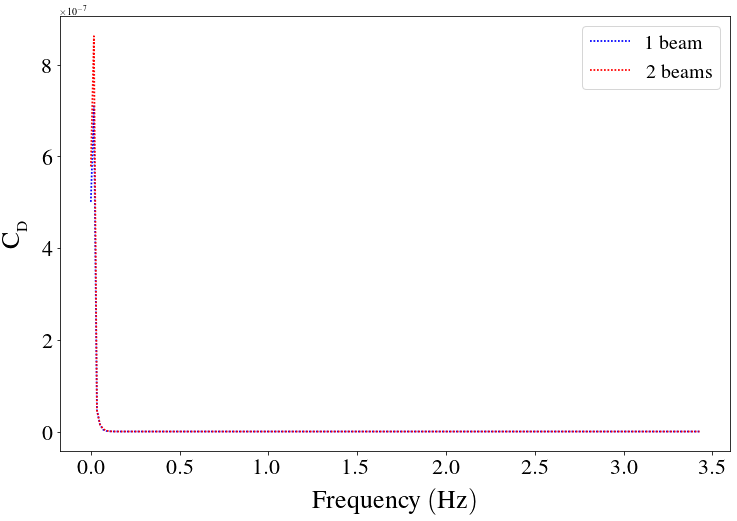

In [579]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cd_amp_1, St1 = calcVortexSheddingFreq(y1_cd,time_smooth,h_beam,u_mid_1)
f_2, Cd_amp_2, St2 = calcVortexSheddingFreq(y2_cd,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cd_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cd_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")    
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_D}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

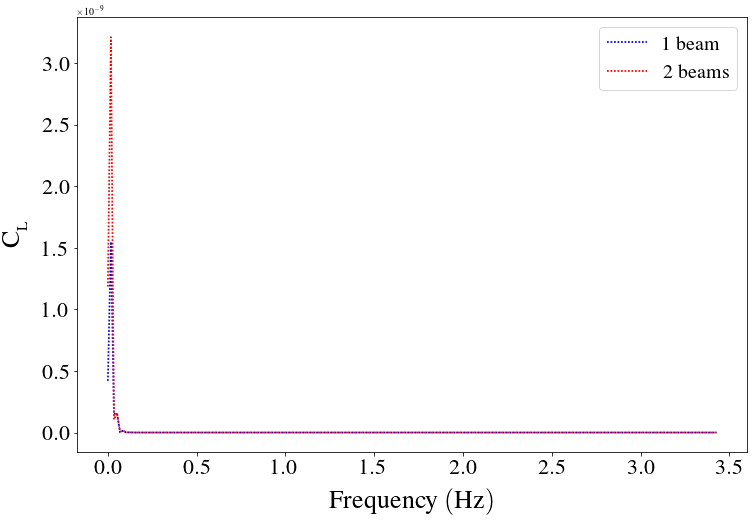

In [580]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
u_mid_1 = U_inf*(h_beam-p_1_1_d['D:1'][tstep_end])/h_channel/2
u_mid_2 = U_inf*(h_beam-p_2_1_d['D:1'][tstep_end])/h_channel/2
f_1, Cl_amp_1, St1 = calcVortexSheddingFreq(y1_cl,time_smooth,h_beam,u_mid_1)
f_2, Cl_amp_2, St2 = calcVortexSheddingFreq(y2_cl,time_smooth,h_beam,u_mid_2)
ax.plot(f_1, Cl_amp_1,linestyle=linestyle, linewidth=1.75, color=cols[0],label="$\\mathrm{1 \ beam}$")   
ax.plot(f_2, Cl_amp_2,linestyle=linestyle, linewidth=1.75, color=cols[1],label="$\\mathrm{2 \ beams}$")   
ax.set_xlabel('$ \\mathrm{Frequency  \ (Hz)}$',fontsize=26,labelpad=10)
ax.set_ylabel('$ \\mathrm{C_{_L}}$',fontsize=26,labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_font_size)
ax.legend(fontsize=20)
ax.ticklabel_format(axis='y',style='sci', scilimits=(-3,-5))
plt.show() 
fig.savefig('%s/fvortex_cl_%s.pdf'%(figPath,figPrefix), dpi=fig.dpi)

In [581]:
y1_05_e9_h4_cd = y1_cd
y1_05_e9_h4_cl = y1_cl
y2_05_e9_h4_cd = y2_cd
y2_05_e9_h4_cl = y2_cl

### Temporal plots

In [1]:
tstep_start = 2
tstep_end = 400
timesteps = np.arange(tstep_start,tstep_end+1)

NameError: name 'np' is not defined

In [85]:
temporal_velocity_data = np.zeros((len(timesteps),99,2))

In [86]:
for i in range(len(timesteps)):
    data_file = "U.{0:d}.csv".format(timesteps[i])
    df = pd.read_csv(data_file)
    df = df.fillna(0)
    Ux = df["U:0"].values[1:-1]
    Uy = df["U:1"].values[1:-1]
    temporal_velocity_data[i,:,0] = Ux
    temporal_velocity_data[i,:,1] = Uy

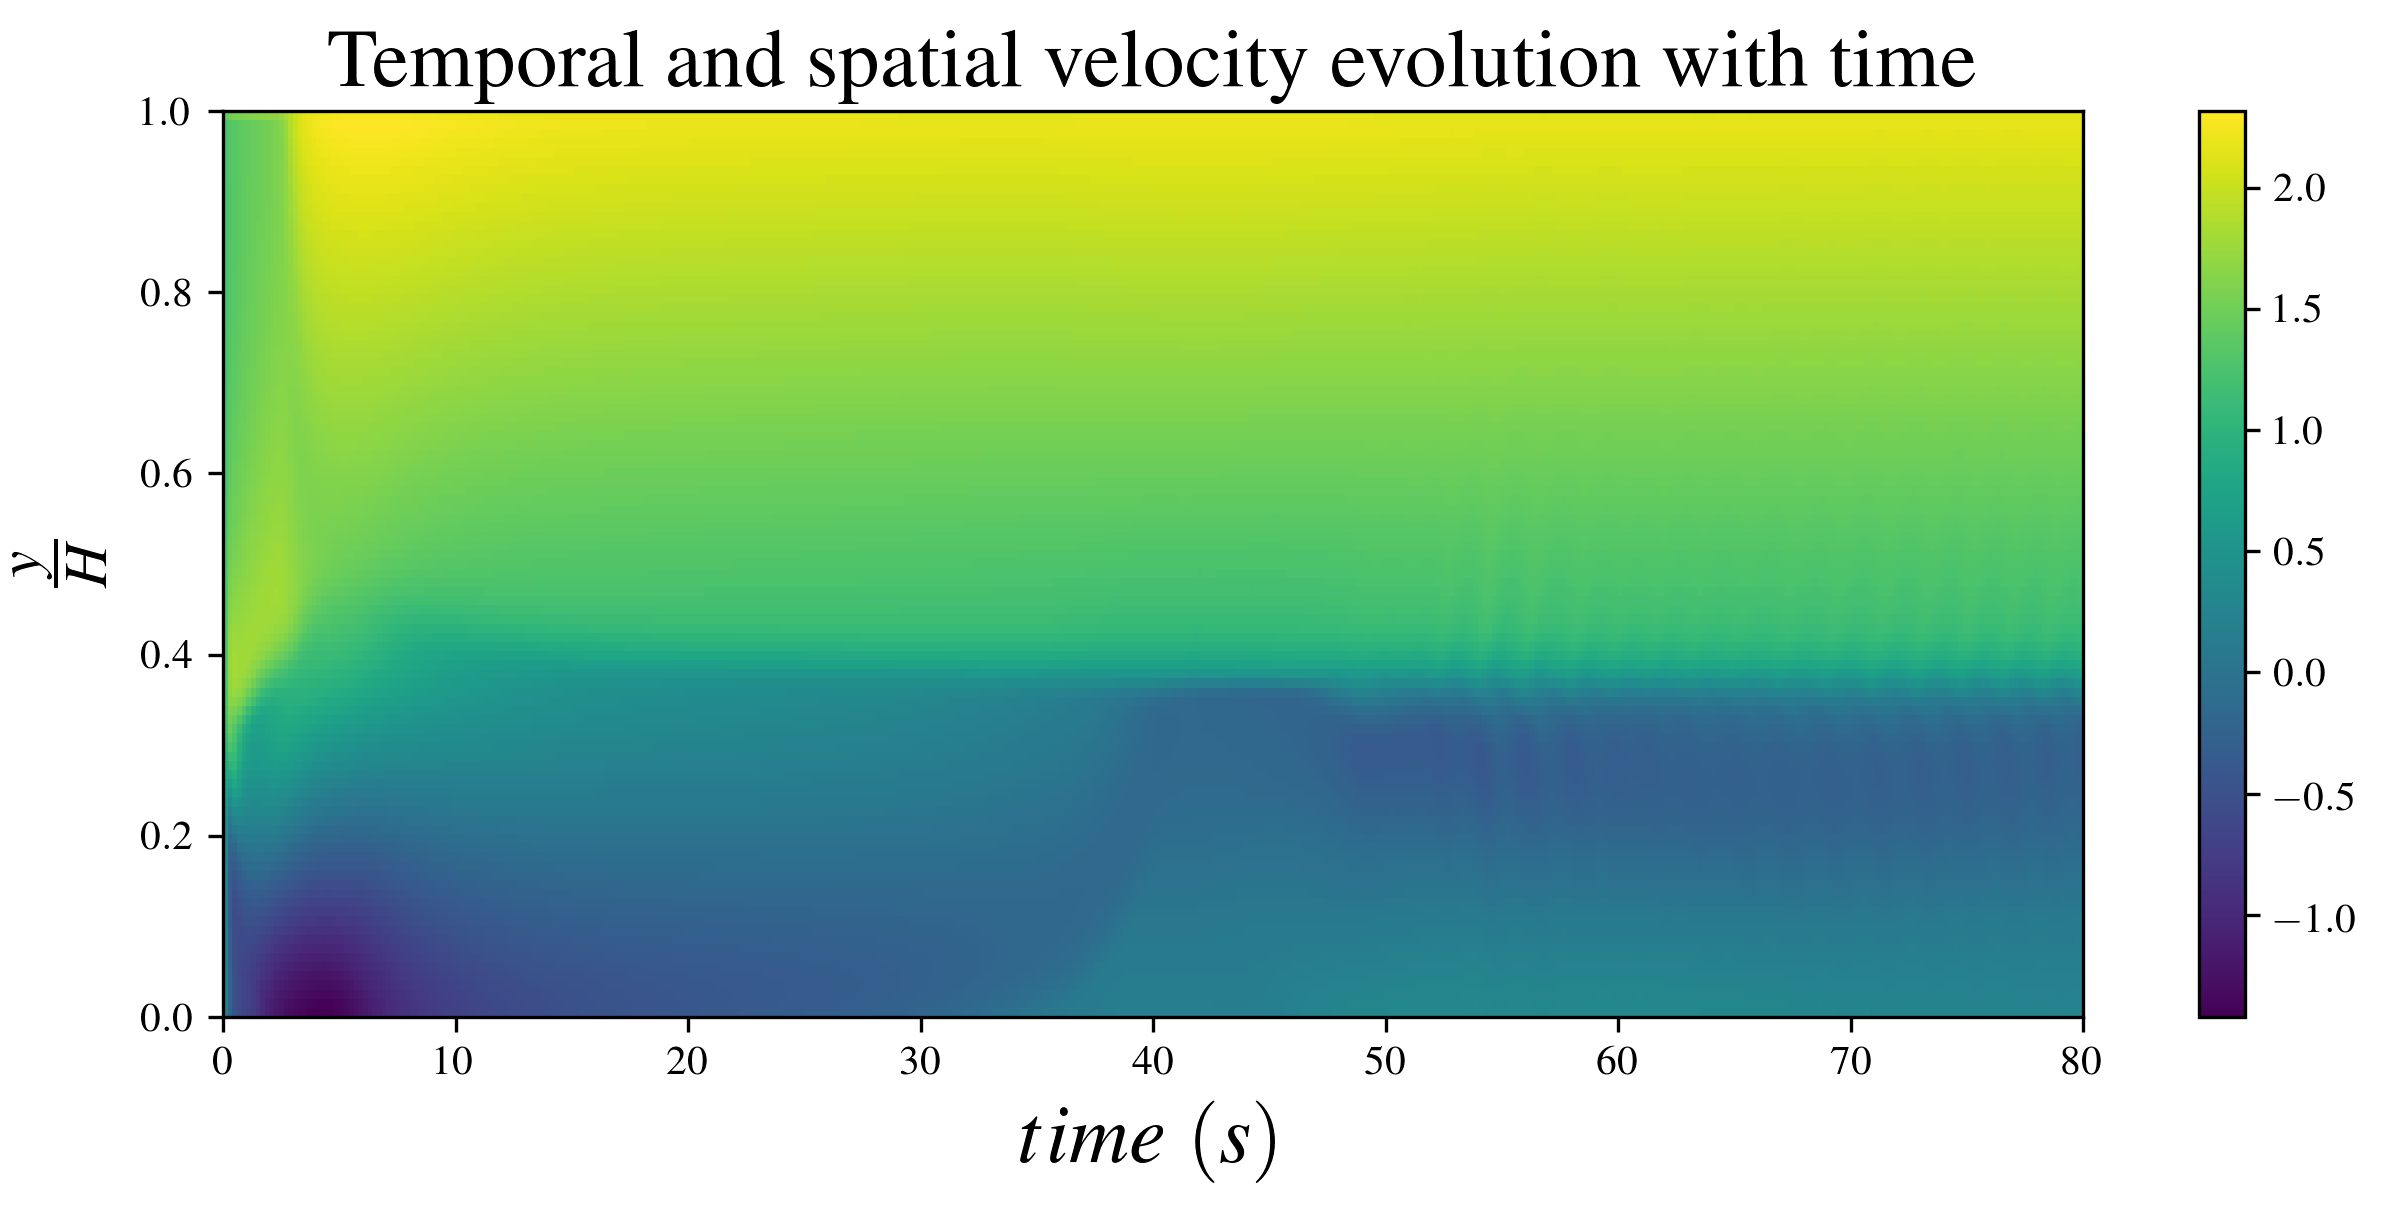

In [94]:
f, ax = plt.subplots(figsize=(10,4),dpi=300,facecolor='w')

plt.imshow(np.transpose(temporal_velocity_data[:,:,0]),
           extent=[0,80,0,1], cmap='viridis',
           vmin=temporal_velocity_data.min(), vmax=temporal_velocity_data.max(),
           origin='lowest', aspect='auto')
ax.set_title('Temporal and spatial velocity evolution with time',fontsize = 20)
ax.set_xlabel('$time \ (s)$',fontsize = 20)
ax.set_ylabel('$\\frac{y_{}}{H}$',fontsize = 20)
plt.colorbar()
plt.show()